# Clustering & PCA Assignment

#### Start date - 19/02/2019   ---- ## End Date - 23/02/2019 
    
## By Naveed Jeddy

### Problem Statement

#### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

#### After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around
#### 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

> Output - We need to suggest the countries which the CEO needs to focus on the most. 

### Let us first import NumPy and Pandas & other pre-requisite Cluserting packages 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Step 1: Reading and Understanding the Dataset


In [2]:
# Read the dataset
country = pd.read_csv("Country-data.csv")

In [3]:
# Check the head of the dataset
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Let's check if we have unique country names
country.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

> it doesn't appear if we have any Typo or duplicate country names..

In [5]:
## To check how many Countries that we have
len(country['country'].unique().tolist())

167

> There are 167 Countries in total with 9 Feature Numeric Variables

### Data quality check and cleaning

In [6]:
#Sanity Check
country.shape
country.describe()
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


> There are 167 rows and 10 columns
>  No dates
> all in Numeric except country which would be categorical variables
> No null values..so no Null treatment is required

In [7]:
# Null check
country.isnull().values.sum()

0

> There are no any Null Values...so no NULL treatment is required

In [8]:
# Describe the dataset to observe any abnormal features
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


>  it appears that there are quite a number of outliers in the dataset
> we can notice that columns çhild_mort, exports, health, imports, income, inflation and gdpp all have outliers i.e. we can see that there is a steep increase of values after 75% quartile.. Life_expec has <25% quartile outliers

> Notice that columns exports, health, imports are given as % of the Total GDP
> Let's convert this into a non-% value

In [9]:
#Converting the columns into non % values
country['exports'] = country['exports'] / 100 * country['gdpp']
country['health'] = country['health'] / 100 * country['gdpp']
country['imports'] = country['imports'] / 100 * country['gdpp']

In [10]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


> Similar Outliers observed with non-% dataframe as well

### Understanding Outliers

>> Goal - to understand outliers and perform the following
    > Creating a Dataframe without Outliers
    > Creating a Dataframe containing only outliers

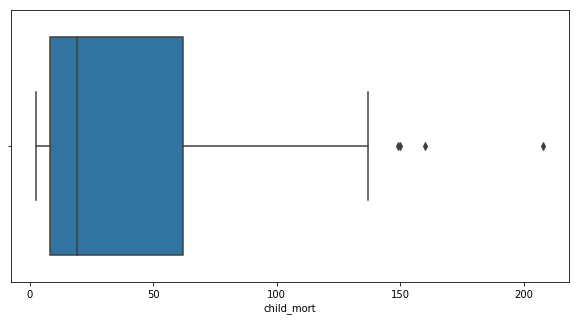

In [12]:
# Let's plot boxplot for column child_mort to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'child_mort', data = country)
plt.show()

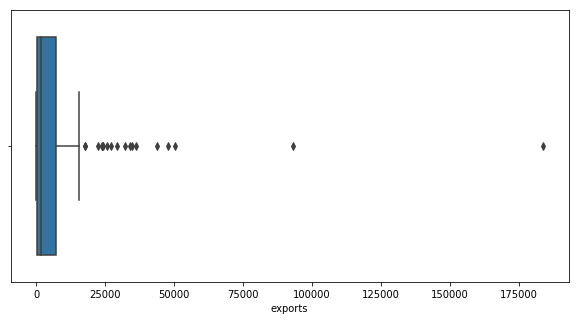

In [13]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'exports', data = country)
plt.show()

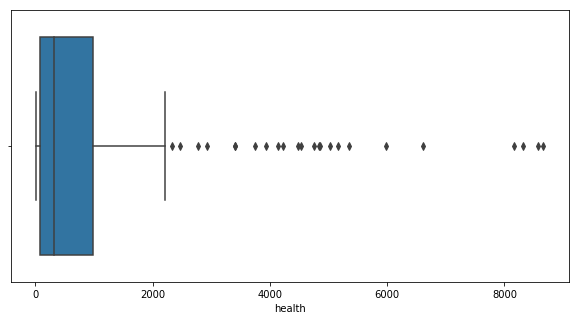

In [14]:

# Let's plot boxplot for column health to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'health', data = country)
plt.show()

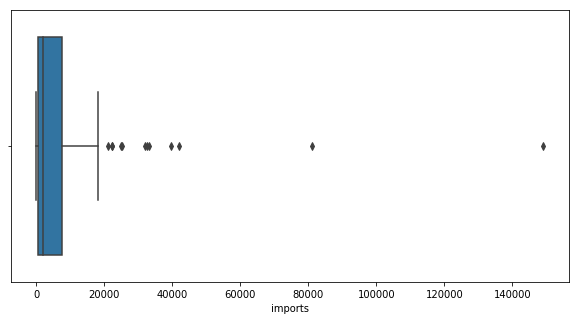

In [15]:
# Let's plot boxplot for column imports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'imports', data = country)
plt.show()

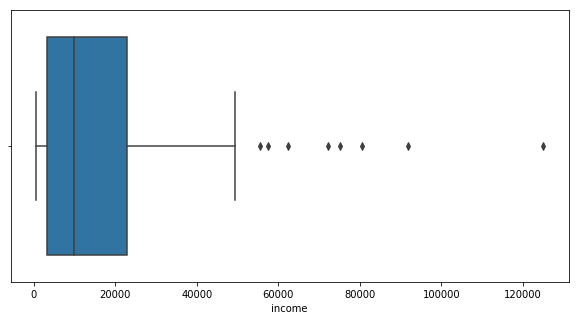

In [16]:
# Let's plot boxplot for column income to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'income', data = country)
plt.show()

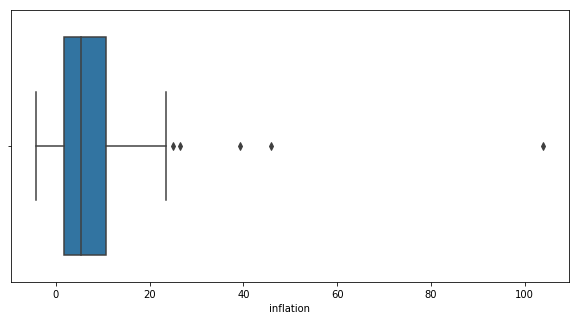

In [17]:
# Let's plot boxplot for column inflation to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'inflation', data = country)
plt.show()

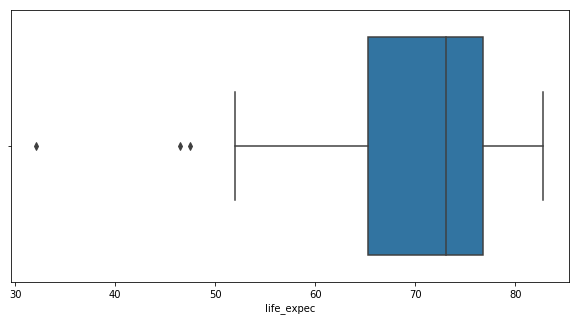

In [18]:
# Let's plot boxplot for column life_expec to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'life_expec', data = country)
plt.show()

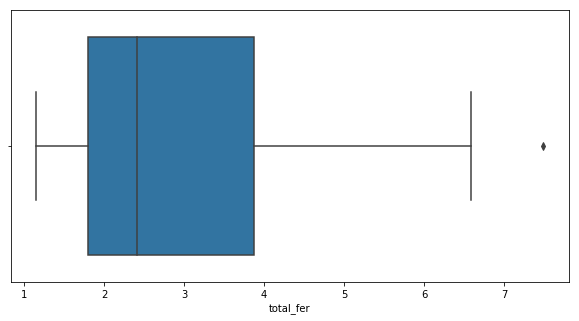

In [19]:
# Let's plot boxplot for column total_fer to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'total_fer', data = country)
plt.show()

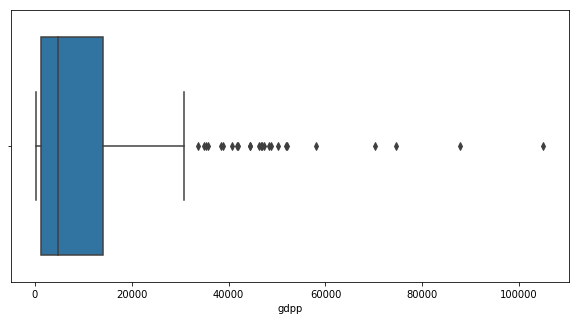

In [20]:
# Let's plot boxplot for column gdpp to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'gdpp', data = country)
plt.show()

> All 9 numeric columns have outliers
> All numeric columns except life_expec have the outliers on the higher side i.e. above 75% percentile
> life_expec has outlier on the lower side i.e. below 25% percentile

In [21]:
# Creating a clone of original dataset before removing outliers
country_new = country.copy()

In [22]:
country_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [23]:
## Generic Function to drop outliers for any column
def drop_outliers(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

In [24]:
# Call function to drop outliers for child_mort
drop_outliers(country_new,'child_mort')

In [25]:
country_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


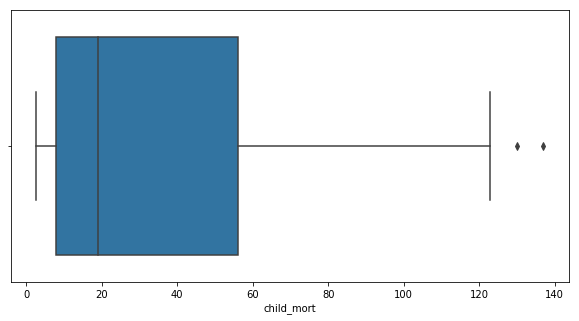

In [26]:
# Let's plot boxplot for column child_mort to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'child_mort', data = country_new)
plt.show()

In [27]:
# Call function to drop outliers for exports
drop_outliers(country_new,'exports')

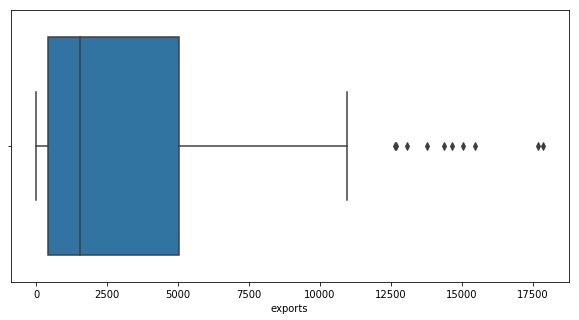

In [28]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'exports', data = country_new)
plt.show()

In [29]:
# Call function to drop outliers for health
drop_outliers(country_new,'health')

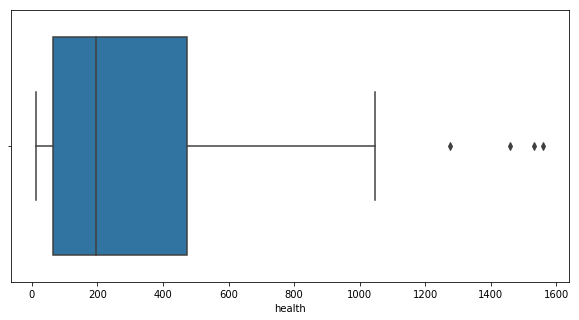

In [30]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'health', data = country_new)
plt.show()

In [31]:
# Call function to drop outliers for imports
drop_outliers(country_new,'imports')

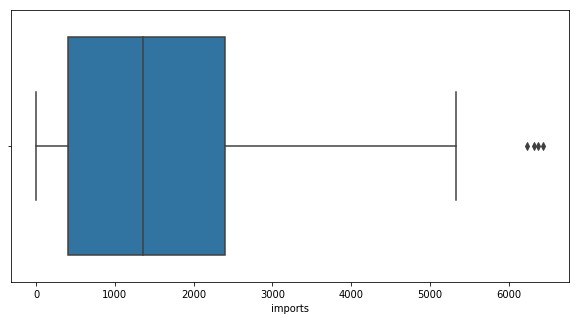

In [32]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'imports', data = country_new)
plt.show()

In [33]:
# Call function to drop outliers for income
drop_outliers(country_new,'income')

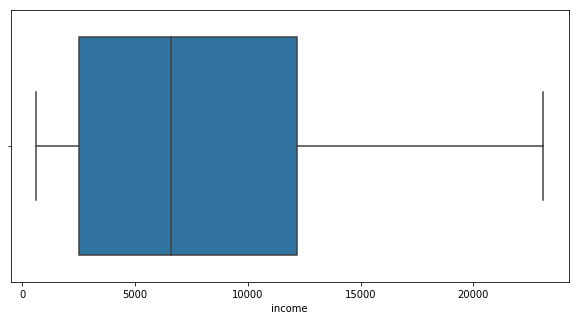

In [34]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'income', data = country_new)
plt.show()

In [35]:
# Call function to drop outliers for inflation
drop_outliers(country_new,'inflation')

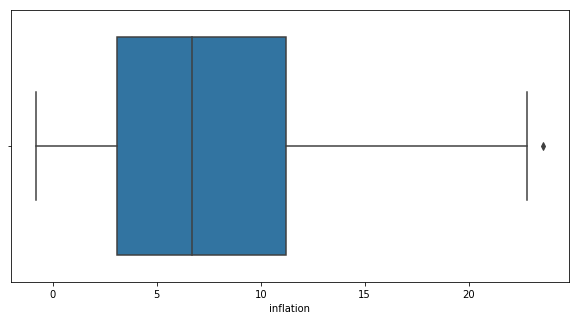

In [36]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'inflation', data = country_new)
plt.show()

In [37]:
# Call function to drop outliers for life_expec
drop_outliers(country_new,'life_expec')

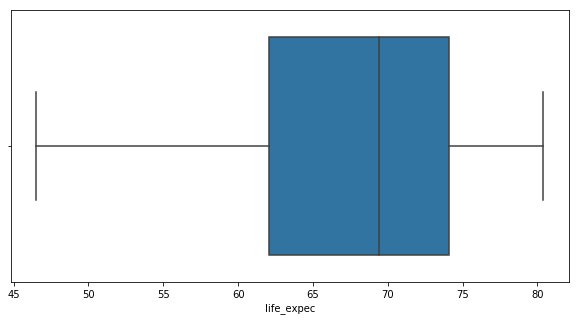

In [38]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'life_expec', data = country_new)
plt.show()

In [39]:
# Call function to drop outliers for total_fer
drop_outliers(country_new,'total_fer')

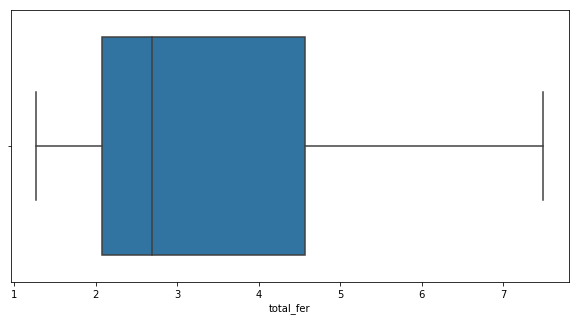

In [40]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'total_fer', data = country_new)
plt.show()

In [41]:
# Call function to drop outliers for gdpp
drop_outliers(country_new,'gdpp')

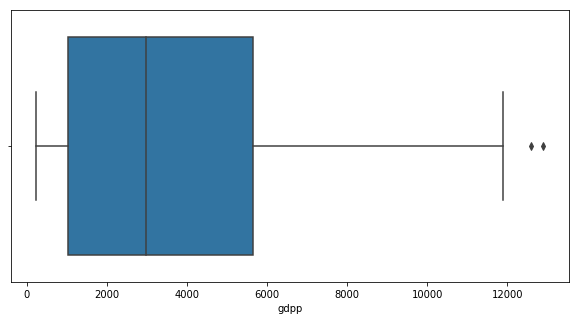

In [42]:
# Let's plot boxplot for column exports to understand outliers better
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'gdpp', data = country_new)
plt.show()

In [43]:
# Checking the shape of the Dataframe after removing Outliers
country_new.shape

(111, 10)

> Now the country_new Dataframe contains rows without Outliers

In [44]:
country_new.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,45.752252,1469.778969,248.860234,1637.752055,7786.621622,7.931730,67.972973,3.281622,3808.378378
std,34.639294,1558.486035,251.267160,1493.564942,5909.983641,5.963427,7.400663,1.510702,3279.739618
min,5.500000,1.076920,12.821200,0.651092,609.000000,-0.812000,46.500000,1.270000,231.000000
25%,17.750000,269.910000,53.996750,395.436500,2500.000000,3.325000,62.000000,2.110000,1020.000000
50%,33.500000,943.200000,163.552000,1279.550000,6440.000000,6.810000,69.200000,2.710000,2970.000000
75%,65.600000,2100.200000,370.638000,2348.640000,11700.000000,11.350000,74.100000,4.580000,5645.000000
max,137.000000,7881.830000,1026.840000,6439.700000,23100.000000,23.600000,80.400000,7.490000,12900.000000


 > Outliers treatment i.e. after removal of Outliers from the above report looks much better than before when compared to the original dataframe

In [45]:
# Creating Clone of Original Dataframe for the different approaches been followed
country1 = country.copy()
country2 = country.copy()
country3 = country.copy()

In [46]:
country.shape


(167, 10)

In [47]:
country_new.shape

(111, 10)

In [48]:
# Creating dataframe that contains only Outlier rows
## That is finding rows of Original DF Country NOT IN the dataframe with oultliers removed country_new

country_outlier = country.query('country not in @country_new.country')
country_outlier.shape

(56, 10)

In [49]:
#Checking Head of Outlier DF
country_outlier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700


In [50]:
#Taking a copy of Outlier DF for Hierarchial Clustering
country_outlier2 = country_outlier.copy()

In [51]:
#Taking a copy of without Outlier DF for Hierarchial Clustering
country_hrch_noout = country_new.copy()

> Out of total 167 countries in the dataset we have 111 countries after removal of Outliers
> We have 56 countries that have outliers that could disturb our clustering analysis if retained

### The Clustering approaches below would start with Original Dataframe with Outliers followed by without Outliers and then on Outliers alone

In [52]:
country_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


In [53]:
country_new.shape

(111, 10)

## Approach 1 

##  K-means ---> PCA ---> Clustering 

### Dataframe - Original i.e. with Outliers

In [54]:
# new dataframe with retaining outliers approach

country_out = country.copy()
country_out.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


> Let's drop country column and retain the 9 Numeric feature Variables alone for further analysis

In [55]:
# drop country column
country_out.drop(['country'],axis=1,inplace=True)


In [56]:
country_out.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Standardize the Variables

In [57]:
## Standardize the variables.
def standardization_f(country_out):
    country_out_bar = np.mean(country_out)
    s = np.std(country_out)
    country_out_z = (country_out - country_out_bar) / s
    return(country_out_z)
print(country_out.corr())
country_out_z = country_out.apply(standardization_f,result_type='broadcast')
country_out_z.head()

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.297230 -0.430438 -0.319138 -0.524315   0.288276   
exports      -0.297230  1.000000  0.612919  0.987686  0.725351  -0.141553   
health       -0.430438  0.612919  1.000000  0.638581  0.690857  -0.253956   
imports      -0.319138  0.987686  0.638581  1.000000  0.672056  -0.179458   
income       -0.524315  0.725351  0.690857  0.672056  1.000000  -0.147756   
inflation     0.288276 -0.141553 -0.253956 -0.179458 -0.147756   1.000000   
life_expec   -0.886676  0.377694  0.545626  0.397515  0.611962  -0.239705   
total_fer     0.848478 -0.291096 -0.407984 -0.317061 -0.501840   0.316921   
gdpp         -0.483032  0.768894  0.916593  0.755114  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.377694  -0.291096  0.768894  
health        0.545626  -0.407984  0.916593  
imports       0.397515  -0.317061  0.755114  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


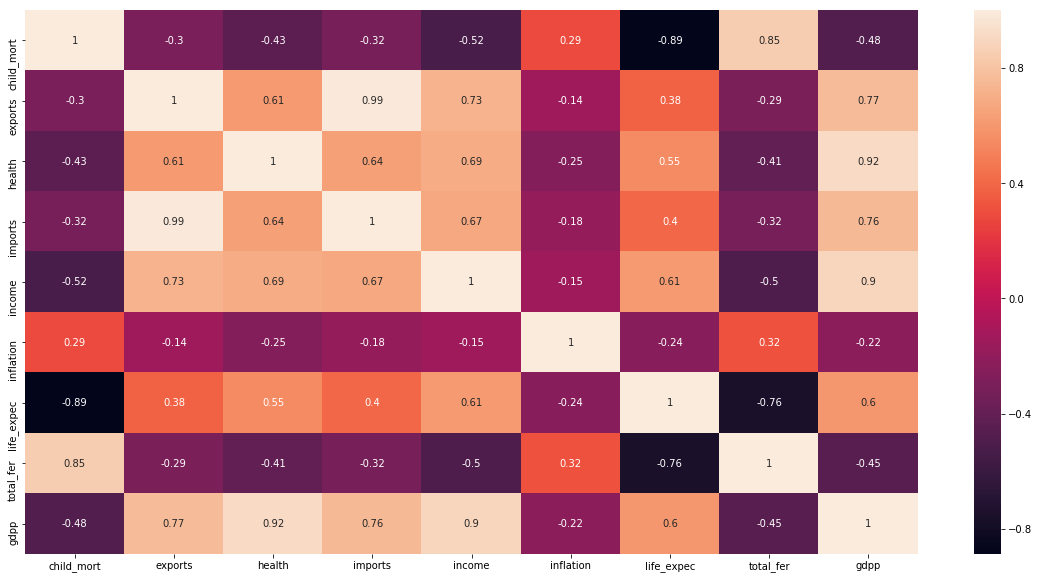

In [58]:
plt.figure(figsize = (20,10))  
sns.heatmap(country_out.corr(),annot = True)

> Exports and Imports are Highly Correlated
> Child_mort and total_fer are Highly Correlated
> Health and gdpp are Highly Correlated
> Exports and Imports are Highly Correlated

#### In k-means clustering, we come up with number of clusters we would like to see. Then after plotting a scatter plot, we see if the number of clusters are appropriate or not.
#### Here, I will start by asking the algorithm to assign three clusters and see how it fits the data.

In [59]:
# perform K means clustering on x_z or standardized data
import scipy
from scipy.cluster.vq import vq, kmeans, whiten
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

In [60]:
#changing country_out_z from dataframe to an array
country_out_z1 = np.array(country_out_z)

In [61]:
##kmeans clustering for 3 clusters
kmeans_x,_ = kmeans(country_out_z1,3)
print(kmeans_x)

[[-0.43155282 -0.22621889 -0.31950613 -0.21319838 -0.19193913 -0.04618906
   0.30079929 -0.46763474 -0.30817542]
 [-0.82905322  1.20739659  1.71903276  1.21344047  1.61206664 -0.47555987
   1.12228688 -0.76956609  1.81153805]
 [ 1.32661038 -0.36504233 -0.52444743 -0.39281661 -0.68923797  0.39181237
  -1.27627565  1.3543418  -0.60496339]]


In [62]:
# assign each sample to a cluster
idx3,_ = vq(country_out_z1,kmeans_x)

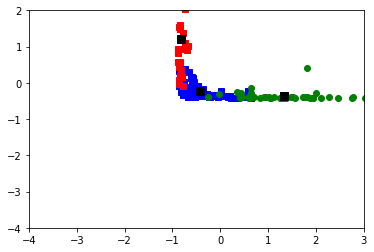

In [63]:
# plot a scatterplot
plt.plot(country_out_z1[idx3==0,0],country_out_z1[idx3==0,1],'sb',
     country_out_z1[idx3==1,0],country_out_z1[idx3==1,1],'sr',
     country_out_z1[idx3==2,0],country_out_z1[idx3==2,1],'og')
plt.plot(kmeans_x[:,0],kmeans_x[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

#### Each color represents a cluster. We don't see a  clean separation beween each cluster. more overlaps
#### Now lets try asking the algorithm for four clusters and observe it in a scatterplot.

In [64]:
##kmeans clustering for 4 clusters
kmeans_x4,_ = kmeans(country_out_z1,4)

In [65]:
# assign each sample to a cluster
idx4,_ = vq(country_out_z1,kmeans_x4)

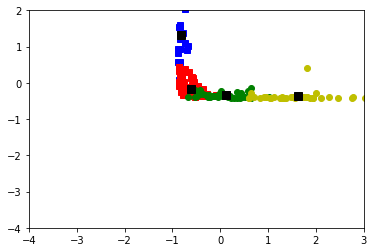

In [66]:
# Plot a scatterplot
plt.plot(country_out_z1[idx4==0,0],country_out_z1[idx4==0,1],'sb',
     country_out_z1[idx4==1,0],country_out_z1[idx4==1,1],'sr',
     country_out_z1[idx4==2,0],country_out_z1[idx4==2,1],'og',
     country_out_z1[idx4==3,0],country_out_z1[idx4==3,1],'oy')
plt.plot(kmeans_x4[:,0],kmeans_x4[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

In [67]:
##kmeans clustering for 2 clusters
kmeans_x2,_ = kmeans(country_out_z1,2)


In [68]:
# assign each sample to a cluster
idx2,_ = vq(country_out_z1,kmeans_x2)

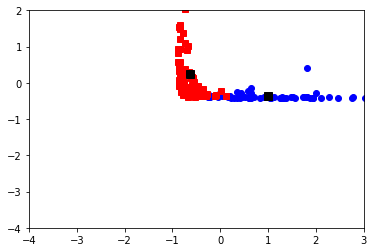

In [69]:
# Plot a scatterplot
plt.plot(country_out_z1[idx2==0,0],country_out_z1[idx2==0,1],'ob',
     country_out_z1[idx2==1,0],country_out_z1[idx2==1,1],'sr')
plt.plot(kmeans_x2[:,0],kmeans_x2[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

#### with K-means as pre-fixed as 2,3,4 was tried but looking at the Scatter plots of K-means , Clustering doesn't appear to be clean, it has much overlaps but let's still proceed with PCA analysis

### PCA Analysis

#### Principal component analysis is a unsupervised machine learning algorithm which reduces the dimensionality of the data by eigenvalue and eigenvector decomposition of the covariance matrix.

#### Lets first start by computing the co-variance matrix of the standardized data.

In [70]:
## Compute covariance matrix of standardized variables.
country_out_pca = country_out_z.cov()
country_out_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.006024,-0.299021,-0.433031,-0.321060,-0.527474,0.290013,-0.892018,0.853589,-0.485942
exports,-0.299021,1.006024,0.616611,0.993636,0.729721,-0.142406,0.379969,-0.292850,0.773526
health,-0.433031,0.616611,1.006024,0.642428,0.695019,-0.255486,0.548913,-0.410442,0.922115
imports,-0.321060,0.993636,0.642428,1.006024,0.676105,-0.180539,0.399910,-0.318971,0.759663
income,-0.527474,0.729721,0.695019,0.676105,1.006024,-0.148646,0.615649,-0.504863,0.900966


In [71]:
## Compute eigenvalues and eigenvectors of covariance matrix. 
eigen_country_out_pca = np.linalg.eig(country_out_pca)
print(eigen_country_out_pca[0])
print(eigen_country_out_pca[1])

[5.33631081e+00 1.67006556e+00 8.97406142e-01 5.49797220e-01
 2.74267850e-01 2.22718073e-01 8.50864327e-02 1.40921616e-02
 4.47261467e-03]
[[-0.31639186  0.47626735  0.15001225  0.14805195  0.1019948  -0.19658519
  -0.76126725  0.00644411  0.00495137]
 [ 0.34288671  0.39731091  0.03057367 -0.44942527 -0.03853829  0.03891112
   0.01366973 -0.05526371  0.71792388]
 [ 0.358535    0.1550529   0.07570322  0.59971228 -0.49319984 -0.18069888
   0.06461567  0.43007213  0.13034593]
 [ 0.34486492  0.37078075  0.07217386 -0.46179779 -0.2527867   0.01217988
  -0.02718244  0.1311355  -0.66568664]
 [ 0.38004113  0.12838448 -0.14576421  0.15480592  0.79407469  0.03814681
   0.02311312  0.3938113  -0.07901102]
 [-0.14308531  0.22126089 -0.94841868  0.00762798 -0.13642345 -0.10840284
   0.02207663 -0.00607016 -0.01128137]
 [ 0.34385651 -0.36981973 -0.19675173  0.01839465 -0.15404105  0.58600986
  -0.58120846  0.002966    0.03159406]
 [-0.30284224  0.4597152   0.07783431  0.21392805 -0.02033568  0.75390

> In this output, the first row is the eigenvalues for the 9 variables we have used in this dataset. The subsequent 9 rows are the eigenvectors in  9 directions.
The number of principal components is equal to the number of variables we have in the dataset. But, not all of the principal components are informative. To see, how many of them are informative or relevant, we calculate the proportion of variance explained by each PC.
Now, lets see what proportion of variance is explained by the Principal components in this analysis.

In [72]:
## Proportion of variance explained by each PC.
print(eigen_country_out_pca[0] / sum(eigen_country_out_pca[0]))

[5.89372984e-01 1.84451685e-01 9.91147170e-02 6.07227801e-02
 3.02917253e-02 2.45982702e-02 9.39743701e-03 1.55641971e-03
 4.93981394e-04]


> We see that first PC explains 59% of the variance and second PC explains 18% of the variance while the third explains only 10% of the variance. So, based on this we will select only the first two PCs.
Now, lets calculate the PC values for the first two PCs. We can do that by matrix multiplying the standardized data with the first two eigenvectors.

In [73]:
## Compute first 2 PCs by matrix multiplying the standardized data array 
## by the first 2 columns of the array of eigenvectors.
print(country_out_z.shape)
print(eigen_country_out_pca[1].shape)
PCs = np.dot(country_out_z, eigen_country_out_pca[1][:, :2])
print(type(PCs))
print(PCs.shape)
PCs[:5, ]

(167, 9)
(9, 9)
<class 'numpy.ndarray'>
(167, 2)


array([[-2.63557499,  1.47226739],
       [-0.02420556, -1.42989187],
       [-0.4595574 , -0.67549538],
       [-2.72263028,  2.17233183],
       [ 0.64859704, -1.02343678]])

In [74]:
cluster = idx3
type(cluster)

numpy.ndarray

> To see, if the PCA algorithm will be able to separate the clusters, I am adding clusters from (k =3) to the original dataframe. Then I will plot the scatterplot of PC1 vs PC2 to see if the three clusters look same as K-means scatter

In [75]:
##Add the cluster membership to first dataframe x_z
country_out_z['cluster'] = cluster[:]
print(country_out_z.tail())

     child_mort   exports    health   imports    income  inflation  \
162   -0.225578 -0.336864 -0.501562 -0.342488 -0.738527  -0.489784   
163   -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   3.616865   
164   -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   0.409732   
165    0.448417 -0.392166 -0.550596 -0.418479 -0.658924   1.500916   
166    1.114951 -0.383952 -0.540498 -0.418445 -0.721358   0.590015   

     life_expec  total_fer      gdpp  cluster  
162   -0.852161   0.365754 -0.546913        0  
163    0.546361  -0.316678  0.029323        0  
164    0.286958  -0.661206 -0.637754        0  
165   -0.344633   1.140944 -0.637754        2  
166   -2.092785   1.624609 -0.629546        2  


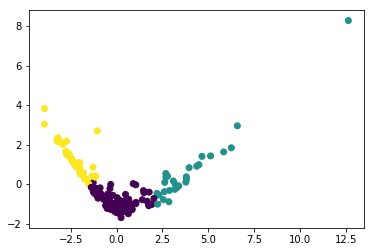

In [76]:
## Scatterplot of first 2 PCs, color coded by cluster membership. 
plt.scatter(PCs[:, 0], PCs[:, 1],c= country_out_z['cluster']) 

In [77]:
##Add the cluster membership to first dataframe country_out
country_out['cluster_ID'] = cluster[:]
print(country_out.tail())
## Sort the countries in country_out by cluster membership
country_out_cluster_sort = country_out.sort_values('cluster_ID')

     child_mort  exports   health  imports  income  inflation  life_expec  \
162        29.2  1384.02  155.925  1565.19    2950       2.62        63.0   
163        17.1  3847.50  662.850  2376.00   16500      45.90        75.4   
164        23.3   943.20   89.604  1050.62    4490      12.10        73.1   
165        56.3   393.00   67.858   450.64    4480      23.60        67.5   
166        83.1   540.20   85.994   451.14    3280      14.00        52.0   

     total_fer   gdpp  cluster_ID  
162       3.50   2970           0  
163       2.47  13500           0  
164       1.95   1310           0  
165       4.67   1310           2  
166       5.40   1460           2  


In [78]:
type(country_out_cluster_sort)

pandas.core.frame.DataFrame

In [79]:
## separate countries  based on cluster membership
cluster1 = country_out_cluster_sort.loc[country_out_cluster_sort["cluster_ID"] == 0]
cluster2 = country_out_cluster_sort.loc[country_out_cluster_sort["cluster_ID"] == 1]
cluster3 = country_out_cluster_sort.loc[country_out_cluster_sort["cluster_ID"] == 2]

In [80]:
#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())

In [81]:
print(c1means)

                       0
child_mort     20.357143
exports      3604.149434
health        547.279455
imports      3710.446386
income      13968.021978
inflation       7.070549
life_expec     73.460440
total_fer       2.235055
gdpp         7979.912088
cluster_ID      0.000000


In [82]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means], axis=1, join_axes = [c1means.index])

In [83]:
## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3']
print(summary)

               Cluster_1     Cluster_2    Cluster_3
child_mort     20.357143      5.046429    91.610417
exports      3604.149434  31038.239286   879.063521
health        547.279455   4327.163214   114.821765
imports      3710.446386  25818.100000   827.028771
income      13968.021978  50178.571429  3897.354167
inflation       7.070549      3.014679    11.911146
life_expec     73.460440     80.514286    59.239583
total_fer       2.235055      1.760714     4.992083
gdpp         7979.912088  48114.285714  1909.208333
cluster_ID      0.000000      1.000000     2.000000


In [84]:
country_out_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
83,29.6,454.080,54.384,718.960,2790,10.000,68.5,3.10,880,0
138,4.1,10917.400,1531.530,10210.200,30400,3.160,80.1,1.23,22100,0
86,10.3,3171.880,622.858,5333.720,16300,0.238,79.8,1.61,8860,0
7,4.8,10276.200,4530.870,10847.100,41400,1.160,82.0,1.93,51900,1
58,4.2,17681.400,4848.800,15507.800,40400,0.758,80.1,1.39,41800,1
114,3.2,34856.600,8323.440,25023.000,62300,5.950,81.0,1.95,87800,1
142,76.7,291.560,93.536,254.560,3370,19.600,66.3,4.88,1480,2
150,90.3,196.176,37.332,279.624,1210,1.180,58.7,4.87,488,2
129,66.8,249.000,56.600,403.000,2180,1.850,64.0,5.06,1000,2


> Inference from above approach


    >>  This approach doesn't seem to be good as we can clearly see there are no clean and separate clusters..at this
    stage assume thet Outliers could be impacting...so now let's try same approach without outliers
    
 


### Approach 1 

### K-means ---> PCA --> Clustering

#### Note: Repeating the same steps now for Dataframe without outliers

In [85]:
# new dataframe with removing outliers approach

country_out_no = country_new.copy()
country_out_no.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


> Let's drop country column and retain the 9 Numeric feature Variables alone for further analysis

In [86]:
# drop country column
country_out_no.drop(['country'],axis=1,inplace=True)


In [87]:
country_out_no.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
5,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


In [88]:
country_out_no.shape

(111, 9)

### Standardize the Variables

In [89]:
## Standardize the variables.
def standardization_f(country_out_no):
    country_out_no_bar = np.mean(country_out_no)
    s = np.std(country_out_no)
    country_out_no_z = (country_out_no - country_out_no_bar) / s
    return(country_out_no_z)
print(country_out_no.corr())
country_out_no_z = country_out_no.apply(standardization_f,result_type='broadcast')
country_out_no_z.head()

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.532320 -0.612752 -0.641884 -0.696653   0.156738   
exports      -0.532320  1.000000  0.685584  0.886478  0.828314  -0.117021   
health       -0.612752  0.685584  1.000000  0.731277  0.831454  -0.171381   
imports      -0.641884  0.886478  0.731277  1.000000  0.777526  -0.320831   
income       -0.696653  0.828314  0.831454  0.777526  1.000000  -0.012726   
inflation     0.156738 -0.117021 -0.171381 -0.320831 -0.012726   1.000000   
life_expec   -0.831907  0.465393  0.556701  0.549385  0.641034  -0.144107   
total_fer     0.879823 -0.508901 -0.590846 -0.599579 -0.693985   0.185851   
gdpp         -0.654403  0.824248  0.929028  0.799727  0.945666  -0.106529   

            life_expec  total_fer      gdpp  
child_mort   -0.831907   0.879823 -0.654403  
exports       0.465393  -0.508901  0.824248  
health        0.556701  -0.590846  0.929028  
imports       0.549385  -0.599579  0.799727  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.288979,-0.911714,-0.827332,-0.934513,-1.049856,0.254067,-1.598014,1.687884,-0.997074
1,-0.845412,-0.209210,0.076099,0.235393,0.364316,-0.579757,1.130276,-1.084940,0.086256
2,-0.535113,0.156538,-0.251379,-0.159610,0.869134,1.375940,1.157423,-0.260407,0.199582
3,2.124175,0.470148,-0.592706,-0.082984,-0.320674,2.437170,-1.068645,1.913966,-0.085263
5,-0.906311,0.307403,2.340516,0.006893,1.854975,2.184496,1.062408,-0.606179,1.988287


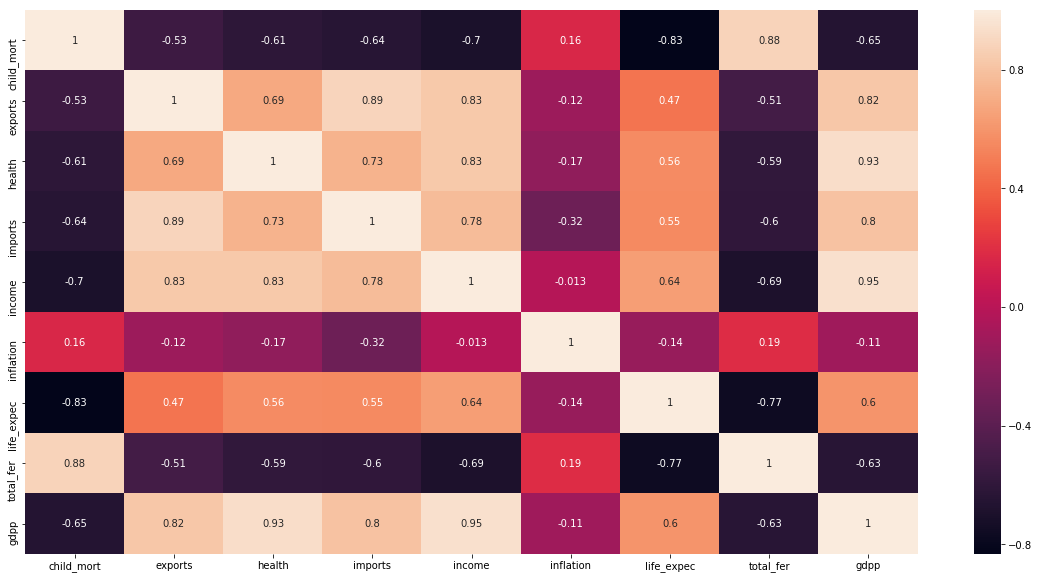

In [90]:
plt.figure(figsize = (20,10))  
sns.heatmap(country_out_no.corr(),annot = True)

In [91]:
# perform K means clustering on x_z or standardized data
import scipy
from scipy.cluster.vq import vq, kmeans, whiten
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

In [92]:
#changing country_out_z from dataframe to an array
country_out_no_z1 = np.array(country_out_no_z)

In [93]:
##kmeans clustering for 3 clusters
kmeans_x1,_ = kmeans(country_out_no_z1,3)
print(kmeans_x1)

[[-0.78979403  1.31397911  1.36867893  1.21914858  1.42154501 -0.09699331
   0.66150259 -0.83606033  1.44430247]
 [ 1.2218766  -0.72981507 -0.78079833 -0.81092085 -0.95063482  0.2232549
  -1.08297227  1.22205272 -0.87600602]
 [-0.46538989 -0.22378878 -0.21732489 -0.10517042 -0.11873205 -0.11322051
   0.43542403 -0.43796188 -0.18945218]]


In [94]:
# assign each sample to a cluster
idx3,_ = vq(country_out_no_z1,kmeans_x1)

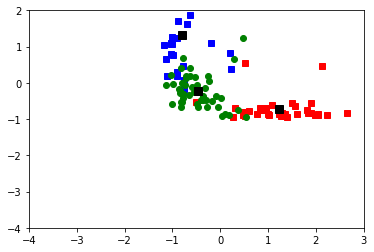

In [95]:
# plot a scatterplot
plt.plot(country_out_no_z1[idx3==0,0],country_out_no_z1[idx3==0,1],'sb',
     country_out_no_z1[idx3==1,0],country_out_no_z1[idx3==1,1],'sr',
     country_out_no_z1[idx3==2,0],country_out_no_z1[idx3==2,1],'og')
plt.plot(kmeans_x1[:,0],kmeans_x1[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

In [96]:
##kmeans clustering for 4 clusters
kmeans_x41,_ = kmeans(country_out_no_z1,4)

In [97]:
# assign each sample to a cluster
idx4,_ = vq(country_out_no_z1,kmeans_x41)

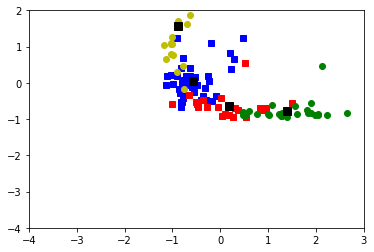

In [98]:
# Plot a scatterplot
plt.plot(country_out_no_z1[idx4==0,0],country_out_no_z1[idx4==0,1],'sb',
     country_out_no_z1[idx4==1,0],country_out_no_z1[idx4==1,1],'sr',
     country_out_no_z1[idx4==2,0],country_out_no_z1[idx4==2,1],'og',
     country_out_no_z1[idx4==3,0],country_out_no_z1[idx4==3,1],'oy')
plt.plot(kmeans_x41[:,0],kmeans_x41[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

In [99]:
##kmeans clustering for 2 clusters
kmeans_x21,_ = kmeans(country_out_no_z1,2)


In [100]:
# assign each sample to a cluster
idx2,_ = vq(country_out_no_z1,kmeans_x21)

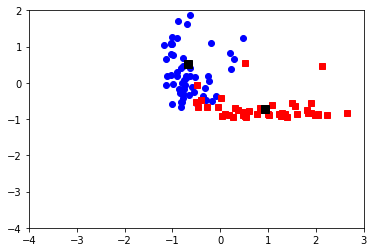

In [101]:
# Plot a scatterplot
plt.plot(country_out_no_z1[idx2==0,0],country_out_no_z1[idx2==0,1],'ob',
     country_out_no_z1[idx2==1,0],country_out_no_z1[idx2==1,1],'sr')
plt.plot(kmeans_x21[:,0],kmeans_x21[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

In [102]:
##kmeans clustering for 5 clusters
kmeans_x51,_ = kmeans(country_out_no_z1,5)


In [103]:
# assign each sample to a cluster
idx5,_ = vq(country_out_no_z1,kmeans_x51)

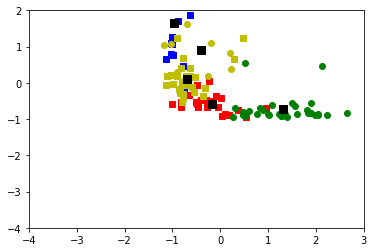

In [104]:
# Plot a scatterplot
plt.plot(country_out_no_z1[idx5==0,0],country_out_no_z1[idx5==0,1],'sb',
     country_out_no_z1[idx5==1,0],country_out_no_z1[idx5==1,1],'sr',
     country_out_no_z1[idx5==2,0],country_out_no_z1[idx5==2,1],'og',
     country_out_no_z1[idx5==3,0],country_out_no_z1[idx5==3,1],'oy',
     country_out_no_z1[idx5==4,0],country_out_no_z1[idx5==4,1],'sy')
plt.plot(kmeans_x51[:,0],kmeans_x51[:,1],'sk',markersize=8)
plt.xlim(-4.0, 3.0)
plt.ylim(-4.0, 2.0)
show()

### PCA Analysis

In [105]:
## Compute covariance matrix of standardized variables.
country_out_no_pca = country_out_no_z.cov()
country_out_no_pca .head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.009091,-0.537160,-0.618322,-0.647719,-0.702986,0.158163,-0.839470,0.887822,-0.660352
exports,-0.537160,1.009091,0.691816,0.894536,0.835844,-0.118084,0.469624,-0.513527,0.831741
health,-0.618322,0.691816,1.009091,0.737925,0.839012,-0.172939,0.561762,-0.596217,0.937473
imports,-0.647719,0.894536,0.737925,1.009091,0.784595,-0.323747,0.554379,-0.605029,0.806998
income,-0.702986,0.835844,0.839012,0.784595,1.009091,-0.012842,0.646862,-0.700294,0.954263


In [106]:
## Compute eigenvalues and eigenvectors of covariance matrix. 
eigen_country_out_no_pca = np.linalg.eig(country_out_no_pca)
print(eigen_country_out_no_pca[0])
print(eigen_country_out_no_pca[1])

[6.0318786  1.07804424 1.01786652 0.39586083 0.24060649 0.1430725
 0.09286298 0.06001787 0.02160814]
[[ 0.34469149 -0.32417844  0.3117798  -0.10744678 -0.1626639   0.4532779
   0.64749187 -0.12276687  0.03326916]
 [-0.34188496 -0.31646109  0.24240692  0.51688947 -0.05684654  0.19160933
  -0.02941377  0.63340106 -0.12257031]
 [-0.35497133 -0.17959277  0.12568996 -0.64600662 -0.01435436 -0.37461037
   0.25646455  0.24923633 -0.37441618]
 [-0.35888065 -0.07120839  0.31279121  0.42255251 -0.03071087 -0.46938825
   0.29217403 -0.52743208  0.07018776]
 [-0.38052352 -0.24723036 -0.05129283 -0.08316855  0.0562353   0.50077282
  -0.316629   -0.48750119 -0.43895771]
 [ 0.08504474 -0.62824098 -0.71812241  0.13385887  0.01338062 -0.20246696
   0.14651613 -0.02667915  0.03334666]
 [-0.31731309  0.34624129 -0.34817056  0.02324016 -0.76618157  0.15041712
   0.21801343  0.0149406   0.01593539]
 [ 0.33468677 -0.34071526  0.28849299 -0.05417537 -0.61538089 -0.25337578
  -0.48371642 -0.06917327 -0.063837

In [107]:
## Proportion of variance explained by each PC.
print(eigen_country_out_no_pca[0] / sum(eigen_country_out_no_pca[0]))

[0.66417082 0.11870357 0.11207739 0.04358828 0.02649321 0.01575373
 0.01022515 0.00660857 0.00237928]


> It's better here as we see first PCA covers 66% , 2nd PCA is 12%. which is 78% variance of the data better than the data with Outliers

In [108]:
## Compute first 2 PCs by matrix multiplying the standardized data array 
## by the first 2 columns of the array of eigenvectors.
print(country_out_no_z.shape)
print(eigen_country_out_no_pca[1].shape)
PCOs = np.dot(country_out_no_z, eigen_country_out_no_pca[1][:, :2])
print(type(PCOs))
print(PCOs.shape)
PCOs[:5, ]

(111, 9)
(9, 9)
<class 'numpy.ndarray'>
(111, 2)


array([[ 3.25751658, -0.68716817],
       [-1.27389306,  1.3229014 ],
       [-0.83552126, -0.46052026],
       [ 2.15303145, -3.17716913],
       [-3.06737534, -1.9903885 ]])

In [109]:
cluster = idx3
type(cluster)

numpy.ndarray

In [110]:
##Add the cluster membership to first dataframe x_z
country_out_no_z['cluster'] = cluster[:]
print(country_out_no_z.tail())

     child_mort   exports    health   imports    income  inflation  \
161   -0.274114 -0.665390 -0.674371 -0.836988 -0.602828   1.443319   
162   -0.480013 -0.055277 -0.371544 -0.048803 -0.822093  -0.894757   
164   -0.651112 -0.339411 -0.636687 -0.394891 -0.560335   0.702142   
165    0.305883 -0.694047 -0.723625 -0.798422 -0.562035   2.639309   
166    1.083080 -0.599168 -0.651119 -0.798086 -0.766002   1.022196   

     life_expec  total_fer      gdpp  cluster  
161    0.112257  -0.626127 -0.743776        2  
162   -0.675011   0.145210 -0.256783        2  
164    0.695921  -0.885456 -0.765216        2  
165   -0.064199   0.923196 -0.765216        1  
166   -2.168105   1.408607 -0.719273        1  


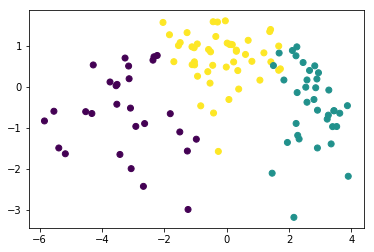

In [111]:
## Scatterplot of first 2 PCs, color coded by cluster membership. 
plt.scatter(PCOs[:, 0], PCOs[:, 1],c= country_out_no_z['cluster']) 

> Clusters also appear well groupd and cleanly seperated

In [112]:
country_out_no_z.shape

(111, 10)

In [113]:
##Add the cluster membership to first dataframe country_out
country_out_no['cluster_ID'] = cluster[:]
print(country_out_no.tail())
## Sort the countries in country_out by cluster membership
country_out_no_cluster_sort = country_out_no.sort_values('cluster_ID')

     child_mort  exports   health  imports  income  inflation  life_expec  \
161        36.3   437.46   80.178   393.30    4240      16.50        68.8   
162        29.2  1384.02  155.925  1565.19    2950       2.62        63.0   
164        23.3   943.20   89.604  1050.62    4490      12.10        73.1   
165        56.3   393.00   67.858   450.64    4480      23.60        67.5   
166        83.1   540.20   85.994   451.14    3280      14.00        52.0   

     total_fer  gdpp  cluster_ID  
161       2.34  1380           2  
162       3.50  2970           2  
164       1.95  1310           2  
165       4.67  1310           1  
166       5.40  1460           1  


In [114]:
type(country_out_no_cluster_sort)

pandas.core.frame.DataFrame

In [115]:
## separate countries  based on cluster membership
cluster1n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 0]
cluster2n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 1]
cluster3n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 2]

In [116]:
#calculate mean values for each clusters
c1meansn = pd.DataFrame(cluster1n.mean())
c2meansn = pd.DataFrame(cluster2n.mean())
c3meansn = pd.DataFrame(cluster3n.mean())

In [117]:
print(c1meansn)

                       0
child_mort     18.517857
exports      3508.351786
health        591.211679
imports      3450.408929
income      16150.000000
inflation       7.355929
life_expec     72.846429
total_fer       2.024286
gdpp         8523.928571
cluster_ID      0.000000


In [118]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary_no_out = pd.concat([c1meansn, c2meansn, c3meansn], axis=1, join_axes = [c1meansn.index])

In [119]:
## Assign column names to the dataframe summary
summary_no_out.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3']
print(summary)

               Cluster_1     Cluster_2    Cluster_3
child_mort     20.357143      5.046429    91.610417
exports      3604.149434  31038.239286   879.063521
health        547.279455   4327.163214   114.821765
imports      3710.446386  25818.100000   827.028771
income      13968.021978  50178.571429  3897.354167
inflation       7.070549      3.014679    11.911146
life_expec     73.460440     80.514286    59.239583
total_fer       2.235055      1.760714     4.992083
gdpp         7979.912088  48114.285714  1909.208333
cluster_ID      0.000000      1.000000     2.000000


In [120]:
clustern = idx4
type(clustern)

numpy.ndarray

In [121]:
##Add the cluster membership to first dataframe x_z
country_out_no_z['clustern'] = clustern[:]
print(country_out_no_z.tail())

     child_mort   exports    health   imports    income  inflation  \
161   -0.274114 -0.665390 -0.674371 -0.836988 -0.602828   1.443319   
162   -0.480013 -0.055277 -0.371544 -0.048803 -0.822093  -0.894757   
164   -0.651112 -0.339411 -0.636687 -0.394891 -0.560335   0.702142   
165    0.305883 -0.694047 -0.723625 -0.798422 -0.562035   2.639309   
166    1.083080 -0.599168 -0.651119 -0.798086 -0.766002   1.022196   

     life_expec  total_fer      gdpp  cluster  clustern  
161    0.112257  -0.626127 -0.743776        2         1  
162   -0.675011   0.145210 -0.256783        2         0  
164    0.695921  -0.885456 -0.765216        2         1  
165   -0.064199   0.923196 -0.765216        1         1  
166   -2.168105   1.408607 -0.719273        1         2  


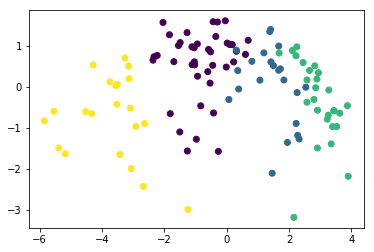

In [122]:
## Scatterplot of first 2 PCs, color coded by cluster membership. 
plt.scatter(PCOs[:, 0], PCOs[:, 1],c= country_out_no_z['clustern']) 

In [123]:
country_out_no_z.shape

(111, 11)

In [124]:
##Add the cluster membership to first dataframe country_out
country_new['cluster_ID'] = clustern[:]
print(country_new.tail())
## Sort the countries in country_out by cluster membership
country_out_no_cluster_sort = country_new.sort_values('cluster_ID')

        country  child_mort  exports   health  imports  income  inflation  \
161  Uzbekistan        36.3   437.46   80.178   393.30    4240      16.50   
162     Vanuatu        29.2  1384.02  155.925  1565.19    2950       2.62   
164     Vietnam        23.3   943.20   89.604  1050.62    4490      12.10   
165       Yemen        56.3   393.00   67.858   450.64    4480      23.60   
166      Zambia        83.1   540.20   85.994   451.14    3280      14.00   

     life_expec  total_fer  gdpp  cluster_ID  
161        68.8       2.34  1380           1  
162        63.0       3.50  2970           0  
164        73.1       1.95  1310           1  
165        67.5       4.67  1310           1  
166        52.0       5.40  1460           2  


In [125]:
type(country_out_no_cluster_sort)

pandas.core.frame.DataFrame

In [126]:
## separate countries  based on cluster membership
cluster1n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 0]
cluster2n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 1]
cluster3n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 2]
cluster4n = country_out_no_cluster_sort.loc[country_out_no_cluster_sort["cluster_ID"] == 3]

In [127]:
#calculate mean values for each clusters
c1meansn = pd.DataFrame(cluster1n.mean())
c2meansn = pd.DataFrame(cluster2n.mean())
c3meansn = pd.DataFrame(cluster3n.mean())
c4meansn = pd.DataFrame(cluster4n.mean())


In [128]:
print(c1meansn)

                      0
child_mort    26.148780
exports     1555.084634
health       277.913829
imports     1951.909756
income      8982.195122
inflation      6.028073
life_expec    71.192683
total_fer      2.507805
gdpp        4256.097561
cluster_ID     0.000000


In [129]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary_no_out = pd.concat([c1meansn, c2meansn, c3meansn,c4meansn], axis=1, join_axes = [c1meansn.index])

In [130]:
## Assign column names to the dataframe summary
summary_no_out.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3']
print(summary)

               Cluster_1     Cluster_2    Cluster_3
child_mort     20.357143      5.046429    91.610417
exports      3604.149434  31038.239286   879.063521
health        547.279455   4327.163214   114.821765
imports      3710.446386  25818.100000   827.028771
income      13968.021978  50178.571429  3897.354167
inflation       7.070549      3.014679    11.911146
life_expec     73.460440     80.514286    59.239583
total_fer       2.235055      1.760714     4.992083
gdpp         7979.912088  48114.285714  1909.208333
cluster_ID      0.000000      1.000000     2.000000


#### Inference from above Summary

> This approach has worked much better on dataframe without outliers as we can clean seperation between Clusters
> But let's hold with this until we see how PCA FIRST  and then K-Means Clustering Approach
> Note this approach might not be good as the number of clusters was pre-determined with just K-means scatter plot visualization
   
   
     
    
 


In [131]:
country_out_no_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
102,Moldova,17.2,638.96000,190.7100,1279.550000,3910,11.10,69.7,1.27,1630,0
35,Colombia,18.6,993.75000,474.3750,1112.500000,10900,3.86,76.4,2.01,6250,0
118,Paraguay,24.1,1779.73000,189.6010,1663.450000,7290,6.10,74.1,2.73,3230,0
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790,10.00,68.5,3.10,880,1
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988,1
99,Mauritania,97.4,608.40000,52.9200,734.400000,3320,18.90,68.2,4.98,1200,1
150,Togo,90.3,196.17600,37.3320,279.624000,1210,1.18,58.7,4.87,488,2
126,Rwanda,63.6,67.56000,59.1150,168.900000,1350,2.61,64.6,4.51,563,2
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.55,58.8,7.49,348,2
124,Romania,11.5,2682.98000,459.2340,3193.240000,17800,3.53,73.7,1.59,8230,3


In [132]:
country_out_no_cluster_sort.to_csv('kmeansfirst_nooutliers.csv')

## Approach 2

### 1.  PCA 
### 2. Find Optimal number of components using scree plot
### 3. Hopkins measure check
### 4 . Silhouette analysis to determin optimal clusters
### 5. K-means clustering
### 6. Cluster analysis

#### For Original Dataframe with Outliers


In [133]:
country_s = country1.copy()
country_s.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [134]:
country_s.drop(['country'], axis=1,inplace=True)
country_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Standardize the Variables

In [135]:
## Standardize the variables.
def standardization_f(country_s):
    country_s_bar = np.mean(country_s)
    s = np.std(country_s)
    country_s_z = (country_s - country_s_bar) / s
    return(country_s_z)
print(country_s.corr())
country_s_z = country_s.apply(standardization_f,result_type='broadcast')
country_s_z.head()

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.297230 -0.430438 -0.319138 -0.524315   0.288276   
exports      -0.297230  1.000000  0.612919  0.987686  0.725351  -0.141553   
health       -0.430438  0.612919  1.000000  0.638581  0.690857  -0.253956   
imports      -0.319138  0.987686  0.638581  1.000000  0.672056  -0.179458   
income       -0.524315  0.725351  0.690857  0.672056  1.000000  -0.147756   
inflation     0.288276 -0.141553 -0.253956 -0.179458 -0.147756   1.000000   
life_expec   -0.886676  0.377694  0.545626  0.397515  0.611962  -0.239705   
total_fer     0.848478 -0.291096 -0.407984 -0.317061 -0.501840   0.316921   
gdpp         -0.483032  0.768894  0.916593  0.755114  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.377694  -0.291096  0.768894  
health        0.545626  -0.407984  0.916593  
imports       0.397515  -0.317061  0.755114  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [136]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [137]:
#Doing the PCA on the train data
pca.fit(country_s_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [138]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [139]:
pca.n_components_

9

In [140]:
colnames = list(country_s.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income


> Top 5 features identfied are child_mort, exports, health, imports, income

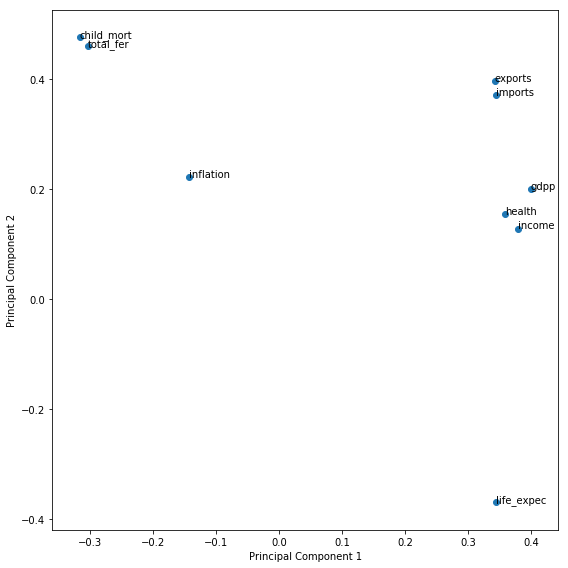

In [141]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [142]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [143]:
#Doing the PCA on the train data
pca.fit(country_s_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

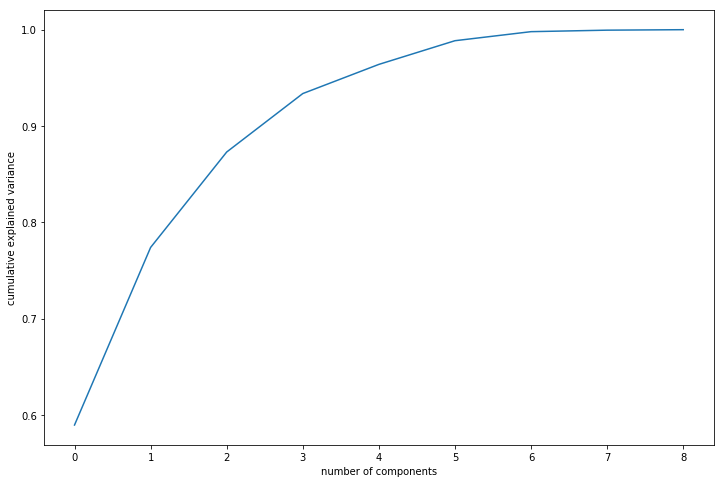

In [144]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

> From above it appears that 5 is the Optimal number of Principal Components we need as we could see a horizantal line starting from 5 in the X-axis above

In [145]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [146]:
df_train_pca = pca_final.fit_transform(country_s_z)
df_train_pca.shape

(167, 5)

In [147]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

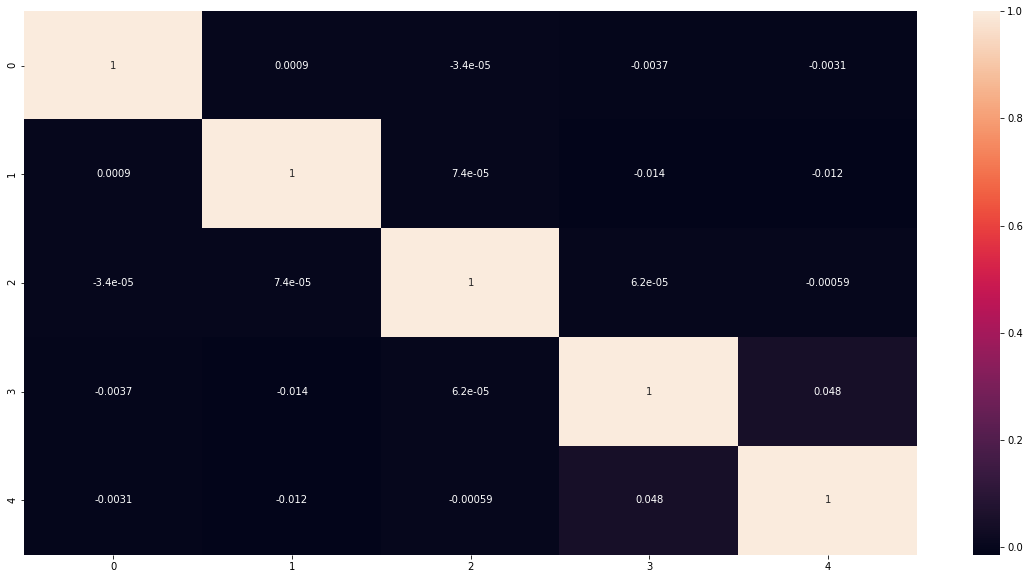

In [148]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

> We could see A Diagonal Matrix and also notice correlation between the 5 features identified above is zero 
> this proves we have removed Multi-collinearity

### Hopkins Statistics:

#### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
#### If the value is between {0.01, ...,0.3}, the data is regularly spaced.
#### If the value is around 0.5, it is random.
#### If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [149]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [150]:
hopkins(country_s_z)

0.9505366644616474

> The Hopkins value of 0.91 proves that the data has tendency to Cluster

## K-Means with some K

In [151]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_train_pca)
model_clus4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [152]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_s_z)
    sse_.append([k, silhouette_score(country_s_z, kmeans.labels_)])

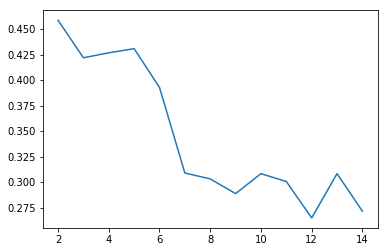

In [153]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

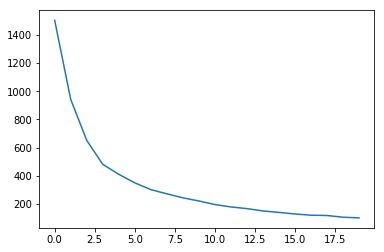

In [154]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_s_z)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

> Optimal number of Clusters appears to be 5
> Let's try first with 4 Clusters

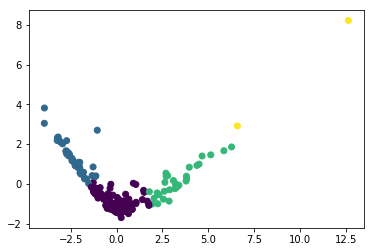

In [155]:
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1],c=model_clus4.labels_) 

In [156]:
##Add the cluster membership to first dataframe x
country1['cluster_ID'] = model_clus4.labels_[:]
print(country1.tail())
## Sort the countries in x by cluster membership
country_cluster_sort = country1.sort_values('cluster_ID')

       country  child_mort  exports   health  imports  income  inflation  \
162    Vanuatu        29.2  1384.02  155.925  1565.19    2950       2.62   
163  Venezuela        17.1  3847.50  662.850  2376.00   16500      45.90   
164    Vietnam        23.3   943.20   89.604  1050.62    4490      12.10   
165      Yemen        56.3   393.00   67.858   450.64    4480      23.60   
166     Zambia        83.1   540.20   85.994   451.14    3280      14.00   

     life_expec  total_fer   gdpp  cluster_ID  
162        63.0       3.50   2970           0  
163        75.4       2.47  13500           0  
164        73.1       1.95   1310           0  
165        67.5       4.67   1310           1  
166        52.0       5.40   1460           1  


In [157]:
type(country_cluster_sort)

pandas.core.frame.DataFrame

In [158]:
## separate countries  based on cluster membership
cluster1 = country_cluster_sort.loc[country_cluster_sort["cluster_ID"] == 0]
cluster2 = country_cluster_sort.loc[country_cluster_sort["cluster_ID"] == 1]
cluster3 = country_cluster_sort.loc[country_cluster_sort["cluster_ID"] == 2]
cluster4 = country_cluster_sort.loc[country_cluster_sort["cluster_ID"] == 3]

In [159]:
#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())

In [160]:
print(c1means)

                       0
child_mort     20.918182
exports      3366.778392
health        482.897845
imports      3461.435467
income      13455.568182
inflation       7.295045
life_expec     73.222727
total_fer       2.242159
gdpp         7332.636364
cluster_ID      0.000000


In [161]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means,c4means], axis=1, join_axes = [c1means.index])

In [162]:
## Assign column names to the dataframe summary
summary.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3']
print(summary)

               Cluster_0    Cluster_1     Cluster_2   Cluster_3
child_mort     20.918182    91.610417      5.082759       2.800
exports      3366.778392   879.063521  21511.096552  138475.000
health        482.897845   114.821765   4084.970000    5001.930
imports      3461.435467   827.028771  18129.900000  115092.000
income      13455.568182  3897.354167  45800.000000   81900.000
inflation       7.295045    11.911146      2.837690       1.787
life_expec     73.222727    59.239583     80.403448      82.000
total_fer       2.242159     4.992083      1.813793       1.390
gdpp         7332.636364  1909.208333  44017.241379   75800.000
cluster_ID      0.000000     1.000000      2.000000       3.000


In [163]:
country_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
83,Kyrgyz Republic,29.6,454.080,54.3840,718.96,2790,10.000,68.5,3.10,880,0
71,Iran,19.3,1593.320,365.6800,1266.82,17400,15.900,74.5,1.76,6530,0
70,Indonesia,33.3,755.730,81.1710,696.64,8430,15.300,69.9,2.48,3110,0
155,Uganda,81.0,101.745,53.6095,170.17,1540,10.600,56.8,6.15,595,1
142,Sudan,76.7,291.560,93.5360,254.56,3370,19.600,66.3,4.88,1480,1
137,South Africa,53.7,2082.080,650.8320,1994.72,12000,6.350,54.3,2.59,7280,1
15,Belgium,4.5,33921.600,4750.8000,33166.80,41100,1.880,80.0,1.86,44400,2
29,Canada,5.6,13793.400,5356.2000,14694.00,40700,2.870,81.3,1.63,47400,2
23,Brunei,10.5,23792.200,1002.5200,9884.00,80600,16.700,77.1,1.84,35300,2
133,Singapore,2.8,93200.000,1845.3600,81084.00,72100,-0.046,82.7,1.15,46600,3


> Randomly have picked the following five countries for Funding Analysis

> Same countries will be used throughout all the models


> Criteria Used for Funding
    > High Child_mort,  Low Income,Low Health






In [164]:
#Country Analysis - for Funding criteria

country_cluster_sort[country_cluster_sort['country'].isin(['Afghanistan','Sudan','Iraq','United Kingdom','India'])]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
69,India,58.8,305.10,54.6750,365.850,4410,8.98,66.2,2.60,1350,0
142,Sudan,76.7,291.56,93.5360,254.560,3370,19.60,66.3,4.88,1480,1
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
72,Iraq,36.9,1773.00,378.4500,1534.500,12700,16.60,67.2,4.56,4500,1
158,United Kingdom,5.2,10969.80,3749.9600,11981.200,36200,1.57,80.3,1.92,38900,2


> Inference
    
    > Afganistan and Sudan falls under the Cluster 0 and fits the funding criteria
    

### K-means 5 --

In [165]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_train_pca)
model_clus5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_s_z)
    sse_.append([k, silhouette_score(country_s_z, kmeans.labels_)])

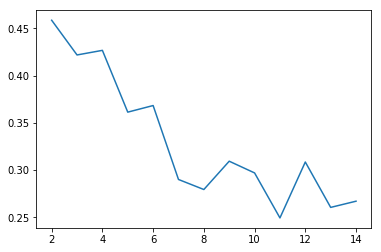

In [167]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

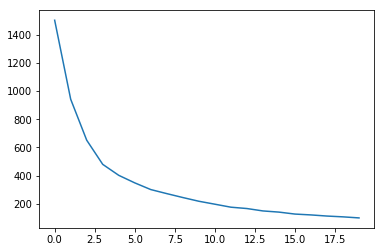

In [168]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_s_z)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

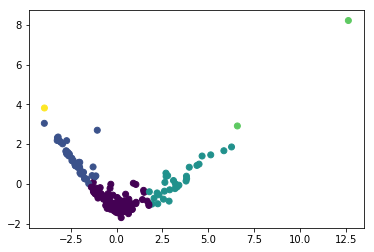

In [169]:
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1],c=model_clus5.labels_) 

In [170]:
##Add the cluster membership to first dataframe x
country1['cluster_ID'] = model_clus5.labels_[:]
print(country1.tail())
## Sort the countries in x by cluster membership
country_cluster5_sort = country1.sort_values('cluster_ID')

       country  child_mort  exports   health  imports  income  inflation  \
162    Vanuatu        29.2  1384.02  155.925  1565.19    2950       2.62   
163  Venezuela        17.1  3847.50  662.850  2376.00   16500      45.90   
164    Vietnam        23.3   943.20   89.604  1050.62    4490      12.10   
165      Yemen        56.3   393.00   67.858   450.64    4480      23.60   
166     Zambia        83.1   540.20   85.994   451.14    3280      14.00   

     life_expec  total_fer   gdpp  cluster_ID  
162        63.0       3.50   2970           0  
163        75.4       2.47  13500           0  
164        73.1       1.95   1310           0  
165        67.5       4.67   1310           1  
166        52.0       5.40   1460           1  


In [171]:
type(country_cluster5_sort)

pandas.core.frame.DataFrame

In [172]:
## separate countries  based on cluster membership
cluster1a = country_cluster5_sort.loc[country_cluster5_sort["cluster_ID"] == 0]
cluster2a = country_cluster5_sort.loc[country_cluster5_sort["cluster_ID"] == 1]
cluster3a = country_cluster5_sort.loc[country_cluster5_sort["cluster_ID"] == 2]
cluster4a = country_cluster5_sort.loc[country_cluster5_sort["cluster_ID"] == 3]
cluster5a = country_cluster5_sort.loc[country_cluster5_sort["cluster_ID"] == 4]

In [173]:
#calculate mean values for each clusters
c1meansa = pd.DataFrame(cluster1a.mean())
c2meansa = pd.DataFrame(cluster2a.mean())
c3meansa = pd.DataFrame(cluster3a.mean())
c4meansa = pd.DataFrame(cluster4a.mean())
c5meansa = pd.DataFrame(cluster5a.mean())


In [174]:
print(c1meansa)

                       0
child_mort     20.918182
exports      3366.778392
health        482.897845
imports      3461.435467
income      13455.568182
inflation       7.295045
life_expec     73.222727
total_fer       2.242159
gdpp         7332.636364
cluster_ID      0.000000


In [175]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summarya = pd.concat([c1meansa, c2meansa, c3meansa,c4meansa,c5meansa], axis=1, join_axes = [c1meansa.index])

In [176]:
## Assign column names to the dataframe summary
summarya.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3','Cluster_4']
print(summarya)

               Cluster_0    Cluster_1     Cluster_2   Cluster_3  Cluster_4
child_mort     20.918182    90.793617      5.082759       2.800    130.000
exports      3366.778392   885.224660  21511.096552  138475.000    589.490
health        482.897845   114.751355   4084.970000    5001.930    118.131
imports      3461.435467   835.999170  18129.900000  115092.000    405.420
income      13455.568182  3870.702128  45800.000000   81900.000   5150.000
inflation       7.295045     9.951809      2.837690       1.787    104.000
life_expec     73.222727    59.212766     80.403448      82.000     60.500
total_fer       2.242159     4.974043      1.813793       1.390      5.840
gdpp         7332.636364  1900.255319  44017.241379   75800.000   2330.000
cluster_ID      0.000000     1.000000      2.000000       3.000      4.000


In [177]:
country_cluster5_sort.groupby('cluster_ID' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
83,Kyrgyz Republic,29.6,454.080,54.3840,718.96,2790,10.000,68.5,3.10,880,0
71,Iran,19.3,1593.320,365.6800,1266.82,17400,15.900,74.5,1.76,6530,0
70,Indonesia,33.3,755.730,81.1710,696.64,8430,15.300,69.9,2.48,3110,0
155,Uganda,81.0,101.745,53.6095,170.17,1540,10.600,56.8,6.15,595,1
142,Sudan,76.7,291.560,93.5360,254.56,3370,19.600,66.3,4.88,1480,1
137,South Africa,53.7,2082.080,650.8320,1994.72,12000,6.350,54.3,2.59,7280,1
157,United Arab Emirates,8.6,27195.000,1281.0000,22260.00,57600,12.500,76.5,1.87,35000,2
159,United States,7.3,6001.600,8663.6000,7647.20,49400,1.220,78.7,1.93,48400,2
23,Brunei,10.5,23792.200,1002.5200,9884.00,80600,16.700,77.1,1.84,35300,2
133,Singapore,2.8,93200.000,1845.3600,81084.00,72100,-0.046,82.7,1.15,46600,3


### Approach 2 ----> without Outliers

In [178]:
country_s1 = country_new.copy()
country_s1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,3


In [179]:
country_s1.drop(['country'], axis=1,inplace=True)
country_s1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
5,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,3


In [180]:
country_s1.shape

(111, 10)

### Standardize the Variables

In [181]:
## Standardize the variables.
def standardization_f(country_s1):
    country_s1_bar = np.mean(country_s1)
    s = np.std(country_s1)
    country_s1_z = (country_s1 - country_s1_bar) / s
    return(country_s1_z)
print(country_s1.corr())
country_s1_z = country_s1.apply(standardization_f,result_type='broadcast')
country_s1_z.head()

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.532320 -0.612752 -0.641884 -0.696653   0.156738   
exports      -0.532320  1.000000  0.685584  0.886478  0.828314  -0.117021   
health       -0.612752  0.685584  1.000000  0.731277  0.831454  -0.171381   
imports      -0.641884  0.886478  0.731277  1.000000  0.777526  -0.320831   
income       -0.696653  0.828314  0.831454  0.777526  1.000000  -0.012726   
inflation     0.156738 -0.117021 -0.171381 -0.320831 -0.012726   1.000000   
life_expec   -0.831907  0.465393  0.556701  0.549385  0.641034  -0.144107   
total_fer     0.879823 -0.508901 -0.590846 -0.599579 -0.693985   0.185851   
gdpp         -0.654403  0.824248  0.929028  0.799727  0.945666  -0.106529   
cluster_ID    0.187673  0.332533  0.314222  0.229923  0.233172   0.036147   

            life_expec  total_fer      gdpp  cluster_ID  
child_mort   -0.831907   0.879823 -0.654403    0.187673  
exports       0.465393  -0.508901  0

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,1.288979,-0.911714,-0.827332,-0.934513,-1.049856,0.254067,-1.598014,1.687884,-0.997074,0.654376
1,-0.845412,-0.209210,0.076099,0.235393,0.364316,-0.579757,1.130276,-1.084940,0.086256,-1.095882
2,-0.535113,0.156538,-0.251379,-0.159610,0.869134,1.375940,1.157423,-0.260407,0.199582,-1.095882
3,2.124175,0.470148,-0.592706,-0.082984,-0.320674,2.437170,-1.068645,1.913966,-0.085263,0.654376
5,-0.906311,0.307403,2.340516,0.006893,1.854975,2.184496,1.062408,-0.606179,1.988287,1.529504


In [182]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca1 = PCA(svd_solver='randomized', random_state=42)

In [183]:
#Doing the PCA on the train data
pca1.fit(country_s1_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [184]:
pca1.components_

array([[-0.33951307,  0.34409748,  0.35668627,  0.35951683,  0.38102072,
        -0.08382897,  0.31305808, -0.32963744,  0.38209017,  0.07061991],
       [ 0.35612625,  0.25182846,  0.17046519,  0.12167849,  0.11128471,
         0.12142223, -0.33469315,  0.35360789,  0.1845985 ,  0.68383491],
       [-0.08455351, -0.02432093, -0.00863257, -0.21778123,  0.18034957,
         0.94500031,  0.09719467, -0.05568359,  0.06791281, -0.04521995],
       [-0.1154432 , -0.5249173 ,  0.26554422, -0.40603144, -0.07815102,
        -0.12340543,  0.38214753, -0.1287658 ,  0.03128859,  0.53928342],
       [ 0.16151544, -0.28168939,  0.58756045, -0.23457199,  0.16464487,
        -0.07346153, -0.39707411,  0.06599789,  0.34931343, -0.42162137],
       [-0.19477416, -0.05398561, -0.12035956, -0.04030144,  0.0020698 ,
         0.01248538, -0.63507046, -0.6921385 , -0.09242253,  0.22795978],
       [ 0.45593281,  0.19364061, -0.36799021, -0.46889195,  0.51122366,
        -0.20416752,  0.15340642, -0.22427555

In [185]:
pca1.n_components_

10

In [186]:
colnames = list(country_s1.columns)
pcs_df1 = pd.DataFrame({'PC1':pca1.components_[0],'PC2':pca1.components_[1], 'Feature':colnames})
pcs_df1.head()

,PC1,PC2,Feature
0,-0.339513,0.356126,child_mort
1,0.344097,0.251828,exports
2,0.356686,0.170465,health
3,0.359517,0.121678,imports
4,0.381021,0.111285,income


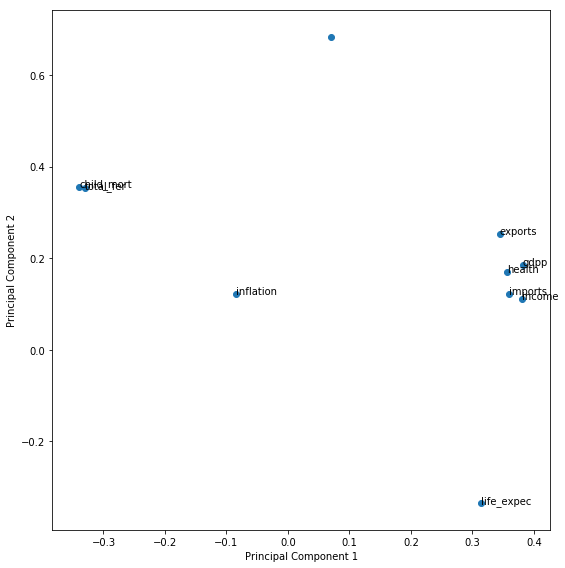

In [187]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df1.PC1, pcs_df1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df1.PC1[i],pcs_df1.PC2[i]))
plt.tight_layout()
plt.show()

In [188]:
pca1.explained_variance_ratio_

array([0.6002229 , 0.16233093, 0.10269037, 0.04632067, 0.03495988,
       0.02221984, 0.01414628, 0.00905741, 0.00591092, 0.0021408 ])

In [189]:
#Doing the PCA on the train data
pca1.fit(country_s1_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

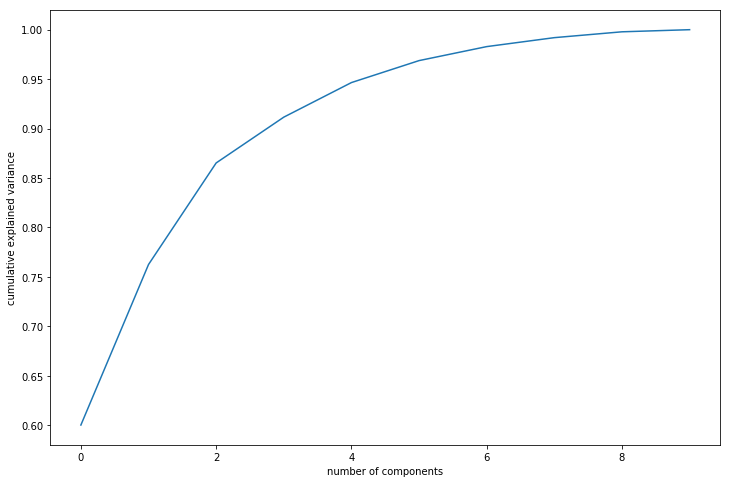

In [190]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [191]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca1_final = IncrementalPCA(n_components=6)

In [192]:
df_train_pca2 = pca1_final.fit_transform(country_s1_z)
df_train_pca2.shape

(111, 6)

In [193]:
#creating correlation matrix for the principal components
corrmat1 = np.corrcoef(df_train_pca2.transpose())

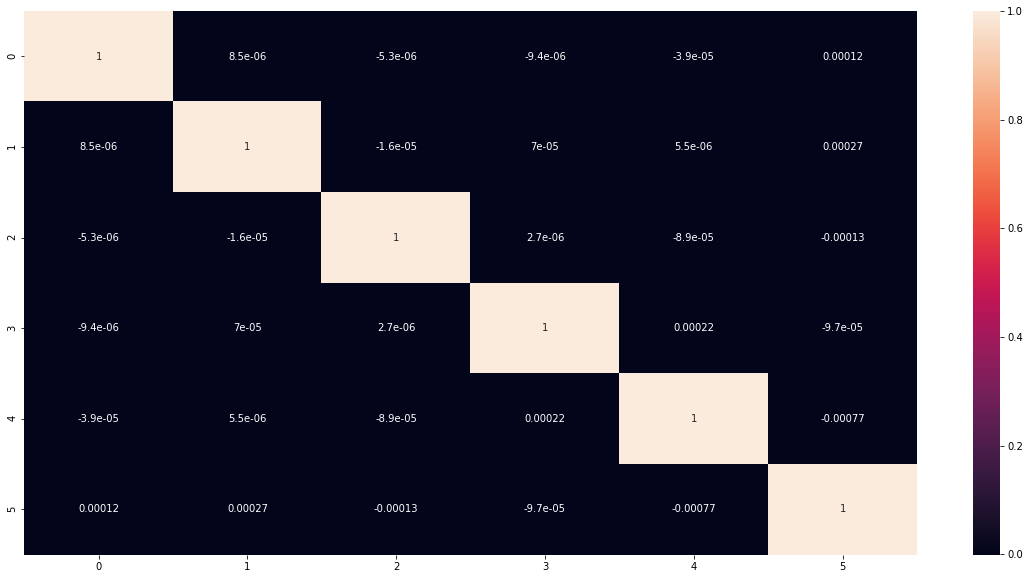

In [194]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat1,annot = True)

### Hopkins Statistics:

#### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
#### If the value is between {0.01, ...,0.3}, the data is regularly spaced.
#### If the value is around 0.5, it is random.
#### If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [195]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [196]:
hopkins(country_s1_z)

0.7793856395965767

## K-Means with some K

In [197]:
# Kmeans with K=4
model_clus4a = KMeans(n_clusters = 4, max_iter=50)
model_clus4a.fit(df_train_pca2)
model_clus4a

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [198]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_s1_z)
    sse_.append([k, silhouette_score(country_s1_z, kmeans.labels_)])

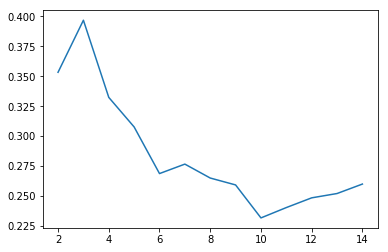

In [199]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

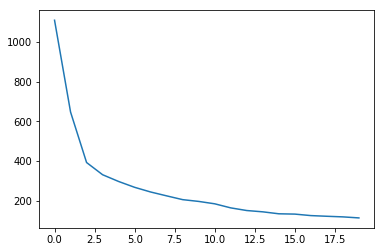

In [200]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_s1_z)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

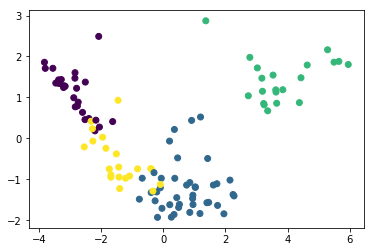

In [201]:
plt.scatter(df_train_pca2[:, 0], df_train_pca2[:, 1],c=model_clus4a.labels_) 

In [202]:
##Add the cluster membership to first dataframe x
country_new['cluster_ID'] = model_clus4a.labels_[:]
print(country_new.tail())
## Sort the countries in x by cluster membership
country_new_cluster_sort = country_new.sort_values('cluster_ID')

        country  child_mort  exports   health  imports  income  inflation  \
161  Uzbekistan        36.3   437.46   80.178   393.30    4240      16.50   
162     Vanuatu        29.2  1384.02  155.925  1565.19    2950       2.62   
164     Vietnam        23.3   943.20   89.604  1050.62    4490      12.10   
165       Yemen        56.3   393.00   67.858   450.64    4480      23.60   
166      Zambia        83.1   540.20   85.994   451.14    3280      14.00   

     life_expec  total_fer  gdpp  cluster_ID  
161        68.8       2.34  1380           3  
162        63.0       3.50  2970           1  
164        73.1       1.95  1310           3  
165        67.5       4.67  1310           3  
166        52.0       5.40  1460           0  


In [203]:
type(country_new_cluster_sort)

pandas.core.frame.DataFrame

In [204]:
## separate countries  based on cluster membership
cluster1n = country_new_cluster_sort.loc[country_new_cluster_sort["cluster_ID"] == 0]
cluster2n = country_new_cluster_sort.loc[country_new_cluster_sort["cluster_ID"] == 1]
cluster3n = country_new_cluster_sort.loc[country_new_cluster_sort["cluster_ID"] == 2]
cluster4n = country_new_cluster_sort.loc[country_new_cluster_sort["cluster_ID"] == 3]

In [205]:
#calculate mean values for each clusters
c1meansn = pd.DataFrame(cluster1n.mean())
c2meansn = pd.DataFrame(cluster2n.mean())
c3meansn = pd.DataFrame(cluster3n.mean())
c4meansn = pd.DataFrame(cluster4n.mean())

In [206]:
print(c1meansn)

                      0
child_mort    94.096296
exports      256.892563
health        51.148052
imports      373.734111
income      1781.296296
inflation      7.235000
life_expec    58.618519
total_fer      5.359259
gdpp         820.222222
cluster_ID     0.000000


In [207]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary1 = pd.concat([c1meansn, c2meansn, c3meansn,c4meansn], axis=1, join_axes = [c1meansn.index])

In [208]:
## Assign column names to the dataframe summary
summary1.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3']
print(summary1)

              Cluster_0    Cluster_1     Cluster_2    Cluster_3
child_mort    94.096296    26.148780     15.080952    52.231818
exports      256.892563  1555.084634   3890.789524   488.378015
health        51.148052   277.913829    641.683190    62.394300
imports      373.734111  1951.909756   3789.400476   549.724868
income      1781.296296  8982.195122  16957.142857  4175.000000
inflation      7.235000     6.028073      7.169333    13.062273
life_expec    58.618519    71.192683     74.385714    67.331818
total_fer      5.359259     2.507805      2.016190     3.381818
gdpp         820.222222  4256.097561   9276.666667  1421.545455
cluster_ID     0.000000     1.000000      2.000000     3.000000


In [209]:

country_new_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)




,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,0
78,Jordan,21.1,1777.440,295.8720,2539.200,9470,8.43,75.8,3.66,3680,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.92,57.1,2.88,6350,1
20,Bosnia and Herzegovina,6.9,1369.170,511.7100,2364.930,9720,1.40,76.8,1.31,4610,1
5,Argentina,14.5,1946.700,834.3000,1648.000,18700,20.90,75.8,2.37,10300,2
117,Panama,19.7,5656.000,654.4800,6318.560,15400,2.59,77.8,2.62,8080,2
121,Poland,6.0,5052.600,939.9600,5304.600,21800,1.66,76.3,1.41,12600,2
142,Sudan,76.7,291.560,93.5360,254.560,3370,19.60,66.3,4.88,1480,3


In [210]:
#Country Analysis - for Funding criteria

country_new_cluster_sort[country_new_cluster_sort['country'].isin(['Afghanistan','Sudan','Iraq','United Kingdom','India'])]



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
72,Iraq,36.9,1773.00,378.4500,1534.500,12700,16.60,67.2,4.56,4500,1
142,Sudan,76.7,291.56,93.5360,254.560,3370,19.60,66.3,4.88,1480,3
69,India,58.8,305.10,54.6750,365.850,4410,8.98,66.2,2.60,1350,3


> Afghanistan has come correctly under Funding Criteria for this model

### Criteria for Funding 

### High Child_mort, Low Income, , Low Health

In [211]:
top3_cntry1 = country_new_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)
top3_cntry1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,0
78,Jordan,21.1,1777.440,295.8720,2539.200,9470,8.43,75.8,3.66,3680,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.92,57.1,2.88,6350,1


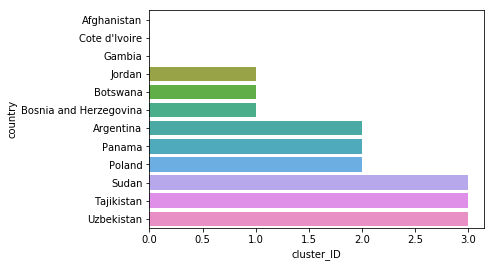

In [212]:
#plotting barplot
#sns.barplot(x=top3_cntry.cluster_ID, y=top3_cntry.country)
sns.barplot(x="cluster_ID", y="country", data=top3_cntry1)

## With K-means as 5

In [213]:
# Kmeans with K=5
model_clus5a = KMeans(n_clusters = 5, max_iter=50)
model_clus5a.fit(df_train_pca2)
model_clus5a

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [214]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_s1_z)
    sse_.append([k, silhouette_score(country_s1_z, kmeans.labels_)])

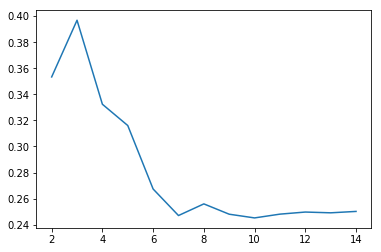

In [215]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

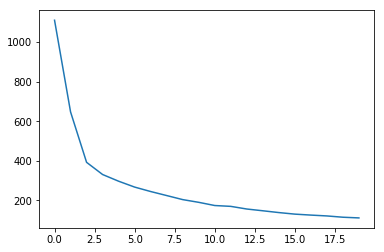

In [216]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_s1_z)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

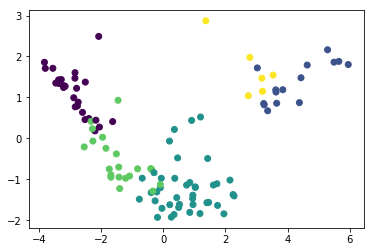

In [217]:
plt.scatter(df_train_pca2[:, 0], df_train_pca2[:, 1],c=model_clus5a.labels_) 

In [218]:
##Add the cluster membership to first dataframe x
country_new['cluster_ID'] = model_clus5a.labels_[:]
print(country_new.tail())
## Sort the countries in x by cluster membership
country_new5_cluster_sort = country_new.sort_values('cluster_ID')

        country  child_mort  exports   health  imports  income  inflation  \
161  Uzbekistan        36.3   437.46   80.178   393.30    4240      16.50   
162     Vanuatu        29.2  1384.02  155.925  1565.19    2950       2.62   
164     Vietnam        23.3   943.20   89.604  1050.62    4490      12.10   
165       Yemen        56.3   393.00   67.858   450.64    4480      23.60   
166      Zambia        83.1   540.20   85.994   451.14    3280      14.00   

     life_expec  total_fer  gdpp  cluster_ID  
161        68.8       2.34  1380           3  
162        63.0       3.50  2970           2  
164        73.1       1.95  1310           3  
165        67.5       4.67  1310           3  
166        52.0       5.40  1460           0  


In [219]:
type(country_new5_cluster_sort)

pandas.core.frame.DataFrame

In [220]:
## separate countries  based on cluster membership
cluster1n5 = country_new5_cluster_sort.loc[country_new5_cluster_sort["cluster_ID"] == 0]
cluster2n5 = country_new5_cluster_sort.loc[country_new5_cluster_sort["cluster_ID"] == 1]
cluster3n5 = country_new5_cluster_sort.loc[country_new5_cluster_sort["cluster_ID"] == 2]
cluster4n5 = country_new5_cluster_sort.loc[country_new5_cluster_sort["cluster_ID"] == 3]
cluster5n5 = country_new5_cluster_sort.loc[country_new5_cluster_sort["cluster_ID"] == 3]

In [221]:
#calculate mean values for each clusters
c1meansn5 = pd.DataFrame(cluster1n5.mean())
c2meansn5 = pd.DataFrame(cluster2n5.mean())
c3meansn5 = pd.DataFrame(cluster3n5.mean())
c4meansn5 = pd.DataFrame(cluster4n5.mean())
c5meansn5 = pd.DataFrame(cluster5n5.mean())

In [222]:
print(c1meansn5)

                      0
child_mort    94.096296
exports      256.892563
health        51.148052
imports      373.734111
income      1781.296296
inflation      7.235000
life_expec    58.618519
total_fer      5.359259
gdpp         820.222222
cluster_ID     0.000000


In [223]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary1_5 = pd.concat([c1meansn5, c2meansn5, c3meansn5,c4meansn5,c5meansn5], axis=1, join_axes = [c1meansn5.index])

In [224]:
## Assign column names to the dataframe summary
summary1_5.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3','Cluster_4']
print(summary1_5)

              Cluster_0     Cluster_1    Cluster_2    Cluster_3    Cluster_4
child_mort    94.096296     12.113333    26.148780    52.231818    52.231818
exports      256.892563   4218.664667  1555.084634   488.378015   488.378015
health        51.148052    670.315400   277.913829    62.394300    62.394300
imports      373.734111   4406.338667  1951.909756   549.724868   549.724868
income      1781.296296  16540.000000  8982.195122  4175.000000  4175.000000
inflation      7.235000      3.723067     6.028073    13.062273    13.062273
life_expec    58.618519     76.080000    71.192683    67.331818    67.331818
total_fer      5.359259      1.895333     2.507805     3.381818     3.381818
gdpp         820.222222   9250.666667  4256.097561  1421.545455  1421.545455
cluster_ID     0.000000      1.000000     2.000000     3.000000     3.000000


In [225]:
#Country Analysis - for Funding criteria

country_new5_cluster_sort[country_new5_cluster_sort['country'].isin(['Afghanistan','Sudan','Iraq','United Kingdom','India'])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
72,Iraq,36.9,1773.00,378.4500,1534.500,12700,16.60,67.2,4.56,4500,2
142,Sudan,76.7,291.56,93.5360,254.560,3370,19.60,66.3,4.88,1480,3
69,India,58.8,305.10,54.6750,365.850,4410,8.98,66.2,2.60,1350,3


> Afghanistan has come under this criteria in this model

In [226]:
country_new5_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.390,56.3,5.27,1220,0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.300,65.5,5.71,562,0
33,Chile,8.7,4863.300,1026.8400,4037.700,19400,8.960,79.1,1.88,12900,1
95,Malaysia,7.9,7881.830,398.1730,6439.700,21100,7.270,74.5,2.15,9070,1
96,Maldives,13.2,5509.600,449.4300,4643.400,10500,2.880,77.9,2.23,7100,1
105,Morocco,33.5,911.260,147.1600,1216.900,6440,0.976,73.5,2.58,2830,2
127,Samoa,18.9,1007.400,223.2150,1831.950,5400,1.720,71.5,4.34,3450,2
18,Bhutan,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180,2
164,Vietnam,23.3,943.200,89.6040,1050.620,4490,12.100,73.1,1.95,1310,3


In [227]:
top3_cntry = country_new5_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)
top3_cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,0
33,Chile,8.7,4863.300,1026.8400,4037.700,19400,8.96,79.1,1.88,12900,1
95,Malaysia,7.9,7881.830,398.1730,6439.700,21100,7.27,74.5,2.15,9070,1


In [228]:
country_new5_cluster_sort.to_csv('kmeans_cluster5_noOutliers.csv')

### Criteria for Funding 

####  High Child_mort, Low Income, Low Health

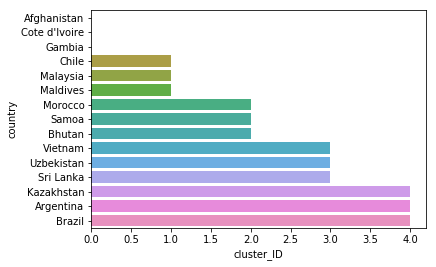

In [229]:
#plotting barplot
#sns.barplot(x=top3_cntry.cluster_ID, y=top3_cntry.country)
sns.barplot(x="cluster_ID", y="country", data=top3_cntry)

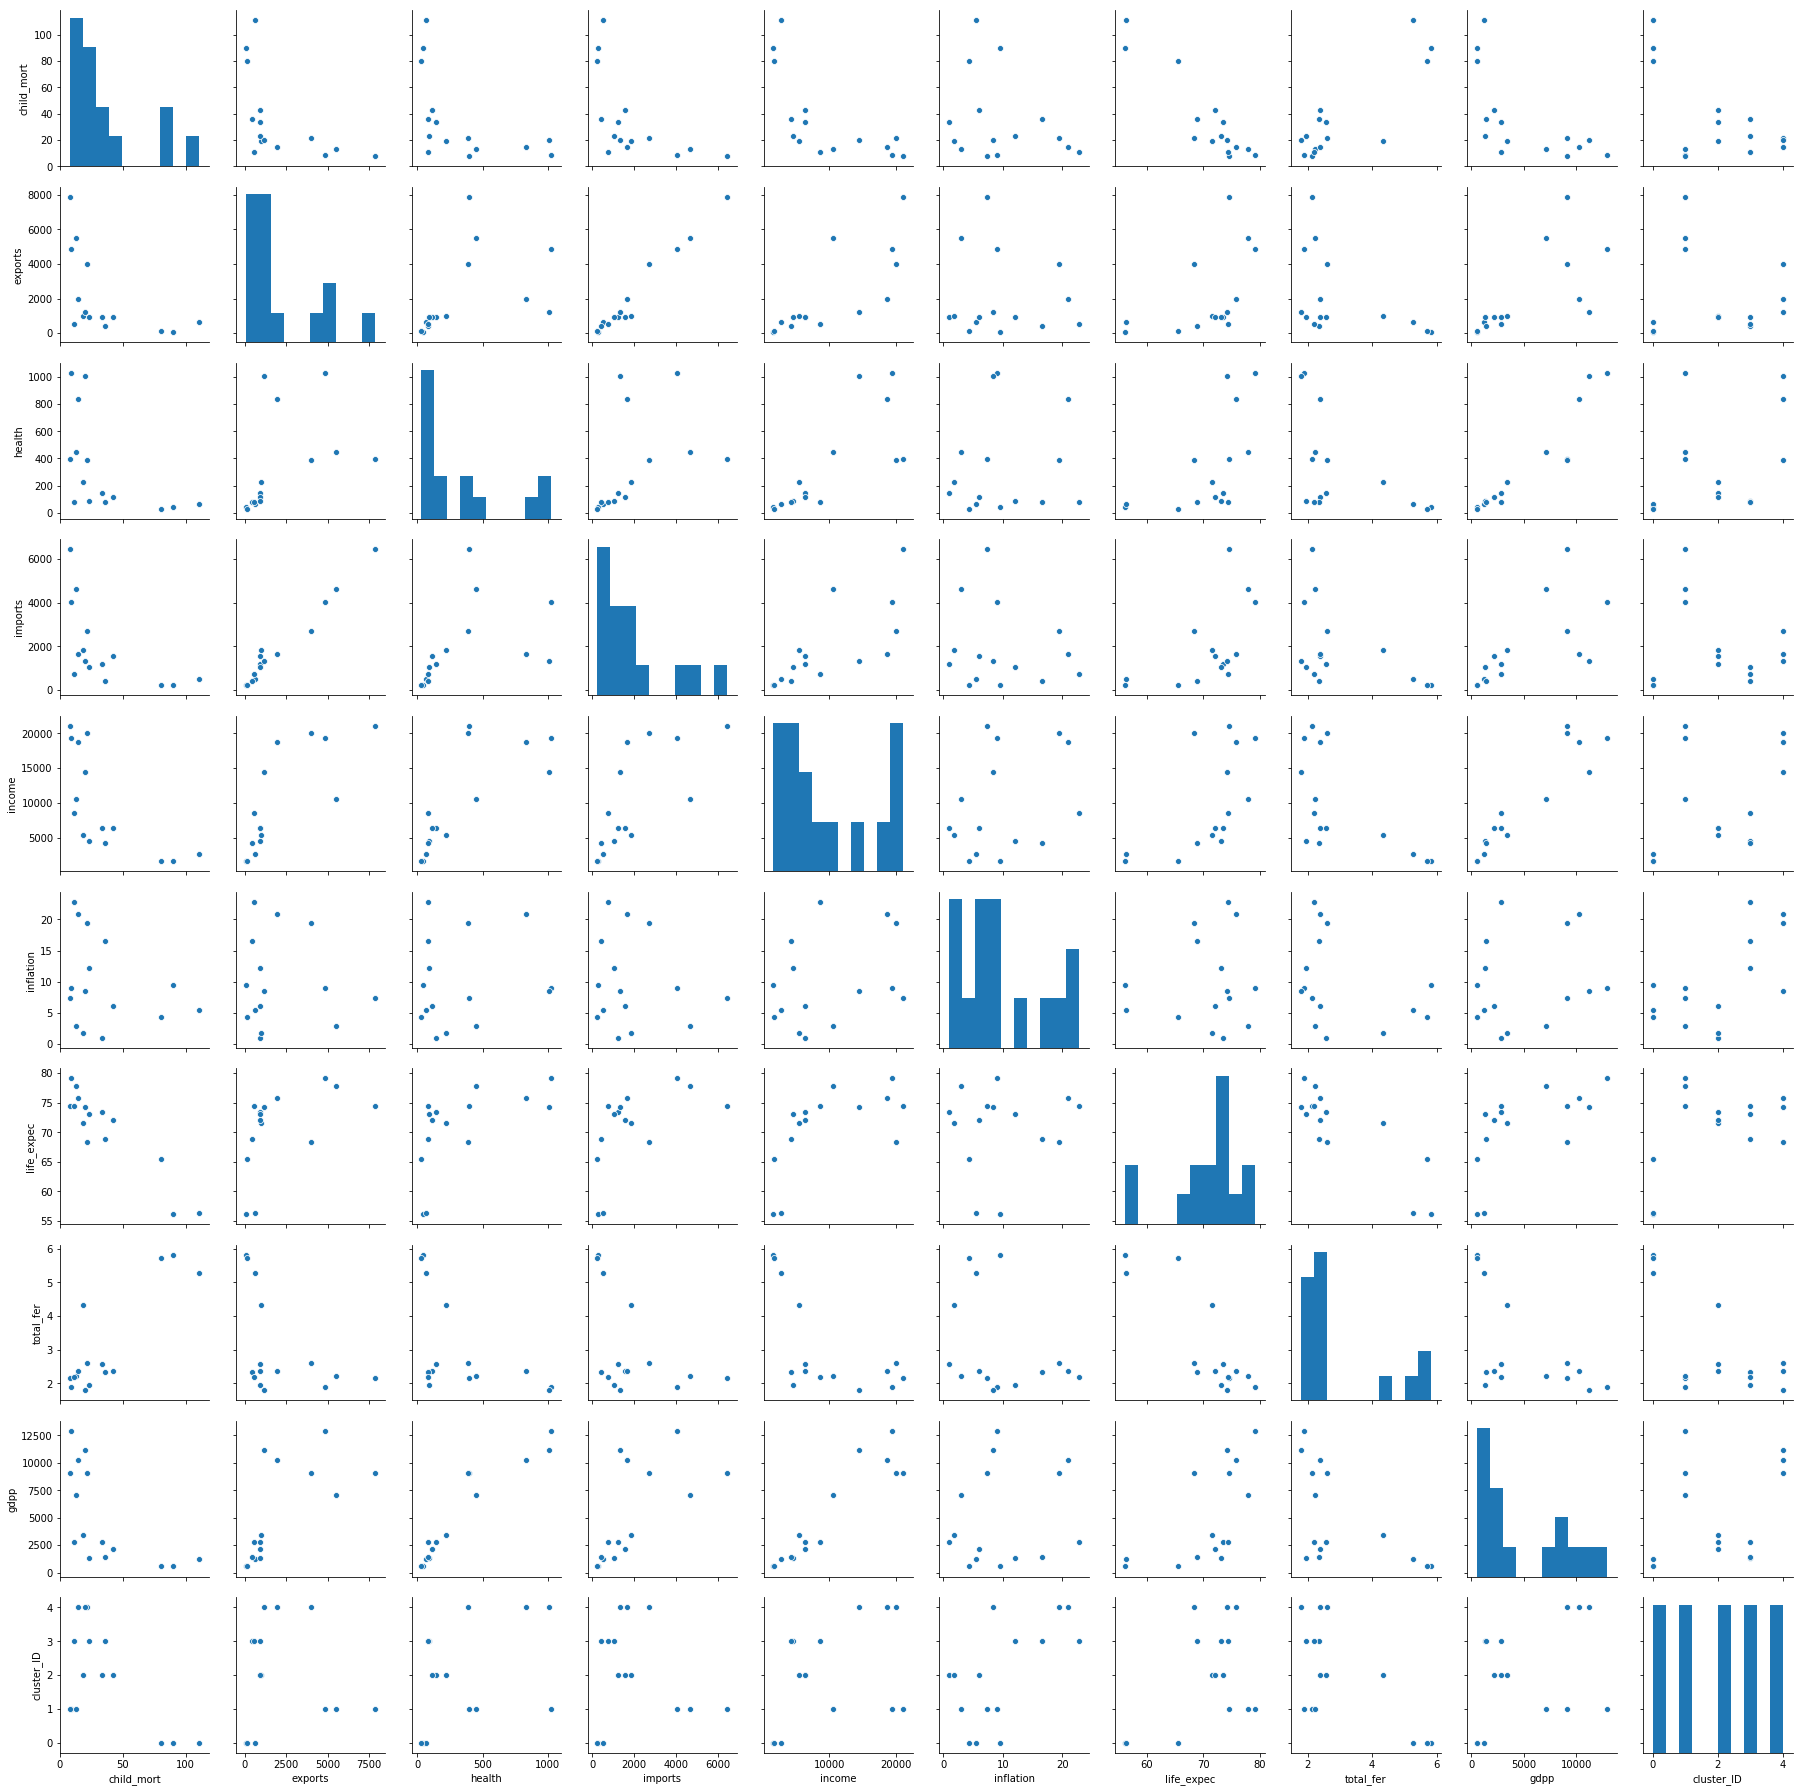

In [230]:
# Create the default pairplot
sns.pairplot(top3_cntry)

> Top 5 features selected from PCA -   childmort,exports,health,imports,income

> Health Factors perspective
        > Cluster_2 Countries -   High Child_mort 

### Approach 2 - on ONLY OUTLIERS 

In [231]:
country_outs = country_outlier.copy()
country_outs.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700


In [232]:
country_outs.drop(['country'], axis=1,inplace=True)
country_outs.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
7,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
10,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
11,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700


In [233]:
country_outs.shape

(56, 9)

### Standardize the Variables

In [234]:
## Standardize the variables.
def standardization_f(country_outs):
    country_outs_bar = np.mean(country_outs)
    s = np.std(country_outs)
    country_outs_z = (country_outs - country_outs_bar) / s
    return(country_outs_z)
print(country_outs.corr())
country_outs_z = country_outs.apply(standardization_f,result_type='broadcast')
country_outs_z.head()

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.253301 -0.423920 -0.270366 -0.490494   0.393904   
exports      -0.253301  1.000000  0.461550  0.985055  0.647552  -0.164077   
health       -0.423920  0.461550  1.000000  0.493244  0.445343  -0.341740   
imports      -0.270366  0.985055  0.493244  1.000000  0.551218  -0.202797   
income       -0.490494  0.647552  0.445343  0.551218  1.000000  -0.218244   
inflation     0.393904 -0.164077 -0.341740 -0.202797 -0.218244   1.000000   
life_expec   -0.948266  0.304233  0.519991  0.321289  0.532634  -0.344184   
total_fer     0.814507 -0.267860 -0.414201 -0.298368 -0.438162   0.551050   
gdpp         -0.501857  0.704509  0.855877  0.675172  0.795959  -0.325265   

            life_expec  total_fer      gdpp  
child_mort   -0.948266   0.814507 -0.501857  
exports       0.304233  -0.267860  0.704509  
health        0.519991  -0.414201  0.855877  
imports       0.321289  -0.298368  0.675172  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,-0.284472,-0.501137,-0.809658,-0.415357,-0.730922,-0.373986,0.120317,-0.121831,-0.863954
7,-0.403550,-0.327850,0.788778,-0.250334,0.251351,-0.391309,0.676448,-0.277420,0.949634
8,-0.414376,0.177631,1.053329,0.271203,0.330638,-0.409066,0.516026,-0.658612,0.721223
10,-0.208696,-0.345313,-0.189044,-0.187733,-0.563539,-0.487393,-0.200528,-0.331876,-0.142173
11,-0.321278,-0.177113,-0.686200,-0.264343,0.238137,-0.002766,0.034758,-0.098493,-0.475654


In [235]:
#Improting the PCA module
from sklearn.decomposition import PCA
pcas = PCA(svd_solver='randomized', random_state=42)

In [236]:
#Doing the PCA on the train data
pcas.fit(country_outs_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [237]:
pcas.components_

array([[-0.34127117,  0.32297721,  0.33485082,  0.32207432,  0.34890917,
        -0.21788958,  0.35542301, -0.32604561,  0.40189307],
       [ 0.41668453,  0.47146914,  0.07685872,  0.4400464 ,  0.15798739,
         0.28199858, -0.33629969,  0.38962737,  0.18749022],
       [-0.28643122, -0.03305891, -0.1771044 , -0.10157629,  0.25845604,
         0.83051189,  0.3355459 ,  0.077593  ,  0.0043931 ],
       [-0.14071372,  0.33630634, -0.72592219,  0.33038297,  0.07373494,
        -0.1377648 , -0.02207402, -0.25487638, -0.37565483],
       [ 0.16496616, -0.15753087, -0.26315254, -0.36005979,  0.78965789,
        -0.23365294, -0.17412021,  0.08303656,  0.18360742],
       [ 0.1754105 , -0.04646619,  0.12678984, -0.05090384,  0.03830279,
         0.33067524, -0.47078035, -0.78334133,  0.04831352],
       [-0.57600181,  0.0667125 ,  0.35606347, -0.00107628,  0.22999263,
        -0.0128507 , -0.48092204,  0.19093629, -0.46495654],
       [ 0.46183359, -0.05864874,  0.32563555,  0.12635391,  0

In [238]:
pcas.n_components_

9

In [239]:
colnames = list(country_outs.columns)
pcs_dfs = pd.DataFrame({'PC1':pcas.components_[0],'PC2':pcas.components_[1], 'Feature':colnames})
pcs_dfs.head()

,PC1,PC2,Feature
0,-0.341271,0.416685,child_mort
1,0.322977,0.471469,exports
2,0.334851,0.076859,health
3,0.322074,0.440046,imports
4,0.348909,0.157987,income


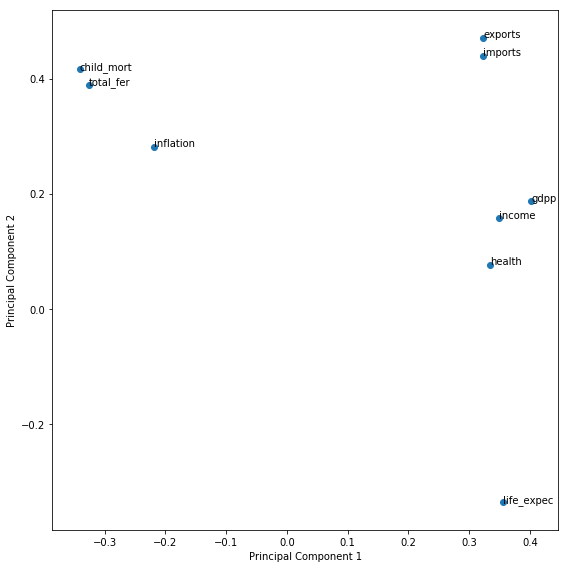

In [240]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_dfs.PC1, pcs_dfs.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_dfs.Feature):
    plt.annotate(txt, (pcs_dfs.PC1[i],pcs_dfs.PC2[i]))
plt.tight_layout()
plt.show()

In [241]:
pcas.explained_variance_ratio_

array([5.57839066e-01, 1.92380068e-01, 9.01272230e-02, 7.58566965e-02,
       5.05254837e-02, 2.71124490e-02, 3.18689843e-03, 2.69786094e-03,
       2.74253740e-04])

In [242]:
#Doing the PCA on the train data
pcas.fit(country_outs_z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

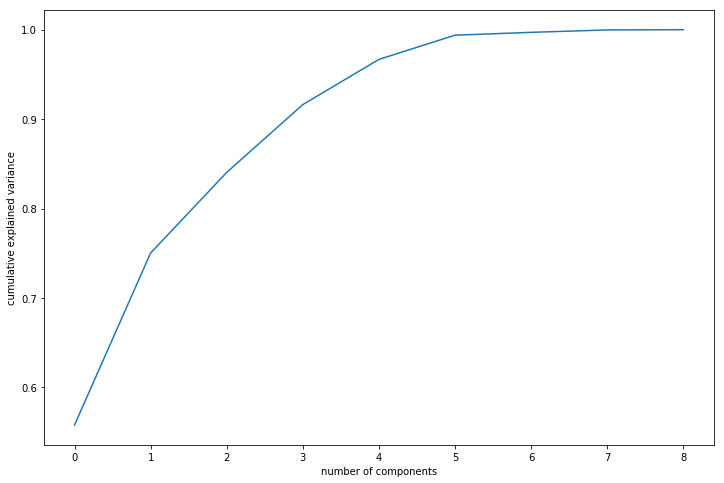

In [243]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pcas.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [244]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pcas_final = IncrementalPCA(n_components=5)

In [245]:
df_train_pcas = pcas_final.fit_transform(country_outs_z)
df_train_pcas.shape

(56, 5)

In [246]:
#creating correlation matrix for the principal components
corrmats = np.corrcoef(df_train_pcas.transpose())

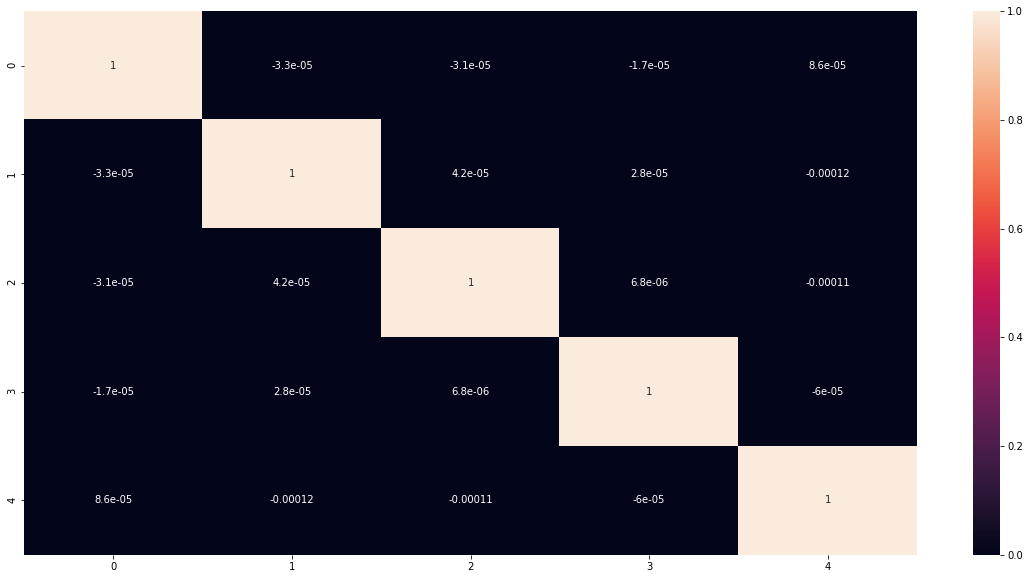

In [247]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmats,annot = True)

### Hopkins Statistics:

#### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
#### If the value is between {0.01, ...,0.3}, the data is regularly spaced.
#### If the value is around 0.5, it is random.
#### If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [248]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [249]:
hopkins(country_outs_z)

0.9075028213335398

## K-Means with some K

In [250]:
# Kmeans with K=5
model_clus5s = KMeans(n_clusters = 5, max_iter=50)
model_clus5s.fit(df_train_pcas)
model_clus5s

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [251]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_outs_z)
    sse_.append([k, silhouette_score(country_outs_z, kmeans.labels_)])

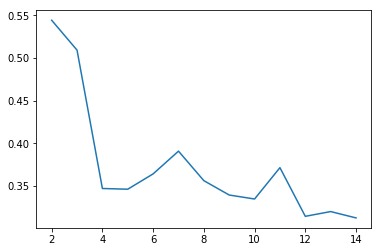

In [252]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

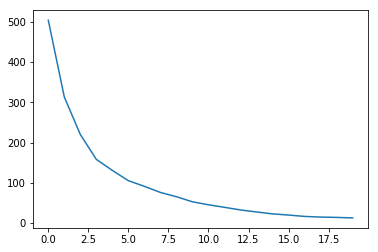

In [253]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_outs_z)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

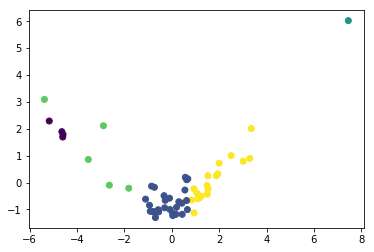

In [254]:
plt.scatter(df_train_pcas[:, 0], df_train_pcas[:, 1],c=model_clus5s.labels_) 

In [255]:
country_outs.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
7,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
10,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
11,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700


In [256]:
##Add the cluster membership to first dataframe x
country_outlier['cluster_ID'] = model_clus5s.labels_[:]
print(country_outs.tail())
## Sort the countries in x by cluster membership
country_news_cluster_sort = country_outlier.sort_values('cluster_ID')

     child_mort  exports   health  imports  income  inflation  life_expec  \
149        62.6     79.2   328.32   1000.8    1850      26.50        71.1   
157         8.6  27195.0  1281.00  22260.0   57600      12.50        76.5   
158         5.2  10969.8  3749.96  11981.2   36200       1.57        80.3   
159         7.3   6001.6  8663.60   7647.2   49400       1.22        78.7   
163        17.1   3847.5   662.85   2376.0   16500      45.90        75.4   

     total_fer   gdpp  
149       6.23   3600  
157       1.87  35000  
158       1.92  38900  
159       1.93  48400  
163       2.47  13500  


/Users/naveedjd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [257]:
type(country_news_cluster_sort)

pandas.core.frame.DataFrame

In [258]:
## separate countries  based on cluster membership
cluster1ns = country_news_cluster_sort.loc[country_news_cluster_sort["cluster_ID"] == 0]
cluster2ns = country_news_cluster_sort.loc[country_news_cluster_sort["cluster_ID"] == 1]
cluster3ns = country_news_cluster_sort.loc[country_news_cluster_sort["cluster_ID"] == 2]
cluster4ns = country_news_cluster_sort.loc[country_news_cluster_sort["cluster_ID"] == 3]
cluster5ns = country_news_cluster_sort.loc[country_news_cluster_sort["cluster_ID"] == 4]
cluster6ns = country_news_cluster_sort.loc[country_news_cluster_sort["cluster_ID"] == 5]

In [259]:
#calculate mean values for each clusters
c1meansns = pd.DataFrame(cluster1ns.mean())
c2meansns = pd.DataFrame(cluster2ns.mean())
c3meansns = pd.DataFrame(cluster3ns.mean())
c4meansns = pd.DataFrame(cluster4ns.mean())
c5meansns = pd.DataFrame(cluster5ns.mean())

In [260]:
print(c1meansns)

                      0
child_mort   166.750000
exports      137.760500
health        39.099525
imports      268.588500
income      1384.500000
inflation      7.762500
life_expec    47.775000
total_fer      5.082500
gdpp         601.000000
cluster_ID     0.000000


In [261]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summarys = pd.concat([c1meansns, c2meansns, c3meansns,c4meansns,c5meansns], axis=1, join_axes = [c1meansns.index])

In [262]:
## Assign column names to the dataframe summary
summarys.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3','Cluster_4']
print(summarys)

              Cluster_0     Cluster_1  Cluster_2   Cluster_3     Cluster_4
child_mort   166.750000      7.750000       2.80     69.3600      4.388889
exports      137.760500  12446.175000  183750.00   4085.1080  29048.800000
health        39.099525   1641.736071    8158.50    403.9082   5141.550556
imports      268.588500  11162.889286  149100.00   3071.3340  24465.133333
income      1384.500000  33435.714286   91700.00  12982.0000  50027.777778
inflation      7.762500      4.114357       3.62     48.1000      1.598444
life_expec    47.775000     77.678571      81.30     66.8200     80.905556
total_fer      5.082500      1.844643       1.63      4.4780      1.780556
gdpp         601.000000  23332.142857  105000.00   7836.0000  52355.555556
cluster_ID     0.000000      1.000000       2.00      3.0000      4.000000


In [263]:

country_news_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)




,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,0
60,Greece,3.9,5944.900,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,1
67,Hungary,6.0,10715.800,960.2300,10021.500,22300,2.330,74.5,1.25,13100,1
128,Saudi Arabia,15.7,9572.800,827.9700,6369.000,45400,17.200,75.1,2.96,19300,1
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.000,60.5,5.84,2330,3
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.500,71.1,6.23,3600,3
163,Venezuela,17.1,3847.500,662.8500,2376.000,16500,45.900,75.4,2.47,13500,3


In [264]:
country_outlier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
4,Antigua and Barbuda,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200,1
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,4
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,4
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,1


In [265]:
country_news_cluster_sort.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446,0
60,Greece,3.9,5944.900,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,1


## With K-means as 5 

In [266]:
# Kmeans with K=4
model_clus5sa = KMeans(n_clusters = 5, max_iter=50)
model_clus5sa.fit(df_train_pcas)
model_clus5sa

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [267]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_outs_z)
    sse_.append([k, silhouette_score(country_outs_z, kmeans.labels_)])

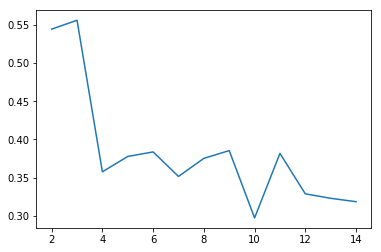

In [268]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

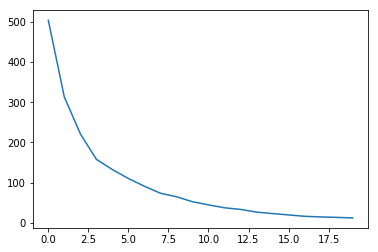

In [269]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_outs_z)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

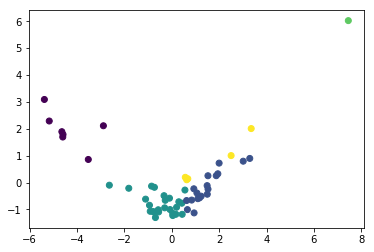

In [270]:
plt.scatter(df_train_pcas[:, 0], df_train_pcas[:, 1],c=model_clus5sa.labels_) 

In [271]:
##Add the cluster membership to first dataframe x
country_outs['cluster_ID'] = model_clus5sa.labels_[:]
print(country_new.tail())
## Sort the countries in x by cluster membership
country_new5s_cluster_sort = country_outlier.sort_values('cluster_ID')

        country  child_mort  exports   health  imports  income  inflation  \
161  Uzbekistan        36.3   437.46   80.178   393.30    4240      16.50   
162     Vanuatu        29.2  1384.02  155.925  1565.19    2950       2.62   
164     Vietnam        23.3   943.20   89.604  1050.62    4490      12.10   
165       Yemen        56.3   393.00   67.858   450.64    4480      23.60   
166      Zambia        83.1   540.20   85.994   451.14    3280      14.00   

     life_expec  total_fer  gdpp  cluster_ID  
161        68.8       2.34  1380           3  
162        63.0       3.50  2970           2  
164        73.1       1.95  1310           3  
165        67.5       4.67  1310           3  
166        52.0       5.40  1460           0  


In [272]:
type(country_new5s_cluster_sort)

pandas.core.frame.DataFrame

In [273]:
## separate countries  based on cluster membership
cluster1n5s = country_new5s_cluster_sort.loc[country_new5s_cluster_sort["cluster_ID"] == 0]
cluster2n5s = country_new5s_cluster_sort.loc[country_new5s_cluster_sort["cluster_ID"] == 1]
cluster3n5s = country_new5s_cluster_sort.loc[country_new5s_cluster_sort["cluster_ID"] == 2]
cluster4n5s = country_new5s_cluster_sort.loc[country_new5s_cluster_sort["cluster_ID"] == 3]
cluster5n5s = country_new5s_cluster_sort.loc[country_new5s_cluster_sort["cluster_ID"] == 4]

In [274]:
#calculate mean values for each clusters
c1meansn5s = pd.DataFrame(cluster1n5s.mean())
c2meansn5s = pd.DataFrame(cluster2n5s.mean())
c3meansn5s = pd.DataFrame(cluster3n5s.mean())
c4meansn5s = pd.DataFrame(cluster4n5s.mean())
c5meansn5s = pd.DataFrame(cluster5n5s.mean())

In [275]:
print(c1meansn5s)

                      0
child_mort   166.750000
exports      137.760500
health        39.099525
imports      268.588500
income      1384.500000
inflation      7.762500
life_expec    47.775000
total_fer      5.082500
gdpp         601.000000
cluster_ID     0.000000


In [276]:
##Concatenate the three dataframes along axis =1 using the index from c1means
summary1_5s = pd.concat([c1meansn5s, c2meansn5s, c3meansn5s,c4meansn5s,c5meansn5s], axis=1, join_axes = [c1meansn5s.index])

In [277]:
## Assign column names to the dataframe summary
summary1_5s.columns = ['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3','Cluster_4']
print(summary1_5s)

              Cluster_0     Cluster_1  Cluster_2   Cluster_3     Cluster_4
child_mort   166.750000      7.750000       2.80     69.3600      4.388889
exports      137.760500  12446.175000  183750.00   4085.1080  29048.800000
health        39.099525   1641.736071    8158.50    403.9082   5141.550556
imports      268.588500  11162.889286  149100.00   3071.3340  24465.133333
income      1384.500000  33435.714286   91700.00  12982.0000  50027.777778
inflation      7.762500      4.114357       3.62     48.1000      1.598444
life_expec    47.775000     77.678571      81.30     66.8200     80.905556
total_fer      5.082500      1.844643       1.63      4.4780      1.780556
gdpp         601.000000  23332.142857  105000.00   7836.0000  52355.555556
cluster_ID     0.000000      1.000000       2.00      3.0000      4.000000


In [278]:
country_new5s_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,0
60,Greece,3.9,5944.900,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,1
67,Hungary,6.0,10715.800,960.2300,10021.500,22300,2.330,74.5,1.25,13100,1
128,Saudi Arabia,15.7,9572.800,827.9700,6369.000,45400,17.200,75.1,2.96,19300,1
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.000,60.5,5.84,2330,3
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.500,71.1,6.23,3600,3
163,Venezuela,17.1,3847.500,662.8500,2376.000,16500,45.900,75.4,2.47,13500,3


In [279]:
top3_cntryo = country_new5s_cluster_sort.groupby('cluster_ID' ,as_index=False).head(3)
top3_cntryo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.200,55.0,5.20,399,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,0
60,Greece,3.9,5944.900,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,1
67,Hungary,6.0,10715.800,960.2300,10021.500,22300,2.330,74.5,1.25,13100,1


In [280]:
country_new5_cluster_sort.to_csv('kmeans_cluster5_noOutliers.csv')

### Criteria for Funding 

#### Cluster 3 - High Child_mort, Low Income, Low Health

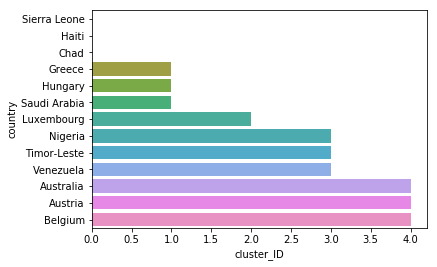

In [281]:
#plotting barplot
#sns.barplot(x=top3_cntry.cluster_ID, y=top3_cntry.country)
sns.barplot(x="cluster_ID", y="country", data=top3_cntryo)

In [282]:
country_new5s_cluster_sort.to_csv('kmeans_cluster5_onlyoutliers.csv')


> Top 5 features selected from PCA -   childmort,exports,health,imports,income



### Hierarchial Clustering  - with no outliers

In [283]:
#reading Dataset
country_hrch = country_hrch_noout.copy()

#Converting the columns into non % values
country_hrch['exports'] = country_hrch['exports'] / 100 * country_hrch['gdpp']
country_hrch['health'] = country_hrch['health'] / 100 * country_hrch['gdpp']
country_hrch['imports'] = country_hrch['imports'] / 100 * country_hrch['gdpp']

In [284]:

country_hrch.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


In [285]:
country_hrch.shape

(111, 10)

In [286]:
country_hrcho = country_hrch.copy()

> Let's drop country column and retain the 9 Numeric feature Variables alone for further analysis

In [287]:
# drop country column
country_hrch.drop(['country'],axis=1,inplace=True)


In [288]:
country_hrch.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
5,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


### Standardize the Variables

In [289]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_norm = standard_scaler.fit_transform(country_hrch)

In [290]:
country_norm = pd.DataFrame(country_norm)
country_norm .columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.288979,-0.911714,-0.827332,-0.934513,-1.049856,0.254067,-1.598014,1.687884,-0.997074
1,-0.845412,-0.209210,0.076099,0.235393,0.364316,-0.579757,1.130276,-1.084940,0.086256
2,-0.535113,0.156538,-0.251379,-0.159610,0.869134,1.375940,1.157423,-0.260407,0.199582
3,2.124175,0.470148,-0.592706,-0.082984,-0.320674,2.437170,-1.068645,1.913966,-0.085263
4,-0.906311,0.307403,2.340516,0.006893,1.854975,2.184496,1.062408,-0.606179,1.988287


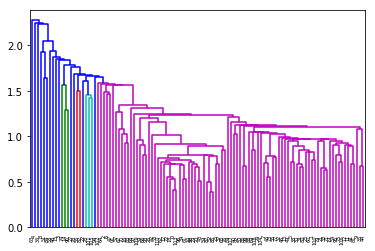

In [291]:
# hierarchical clustering
mergings = linkage(country_norm, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

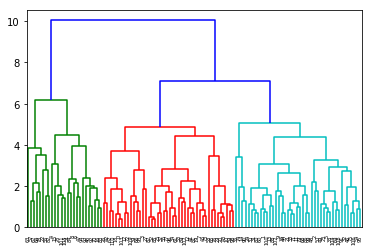

In [292]:
# hierarchical clustering
mergings = linkage(country_norm, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [293]:
## making sure that the data is in n x p matrix format, where n = observations/individuals, p = features
mat = country_norm.as_matrix()

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [294]:
mat.shape

(111, 9)

In [295]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [296]:
# generate the linkage matrix
Z = linkage(mat, 'average',metric='euclidean')

In [297]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

> Cophenetic Correlation Coefficient gives the correlation between actual pairwise distance of all samples to those implied by hierarchical clustering.
The closer the value is to 1, the better the clustering preserves the original distances. Here, we are calculating that using cophenet() function.

In [298]:
c, coph_dists = cophenet(Z, pdist(mat))
c

0.7149202013514154

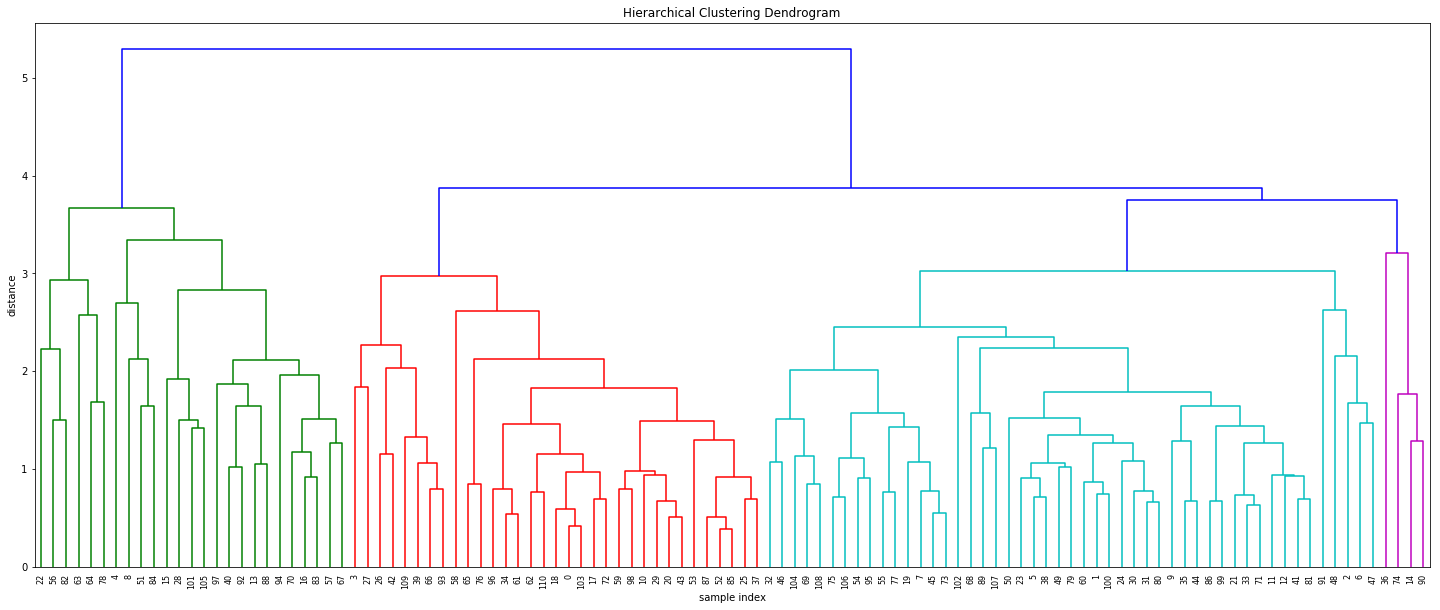

In [299]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [300]:
## From visual inspection, the cutoff distance is set at 3
max_d = 3

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

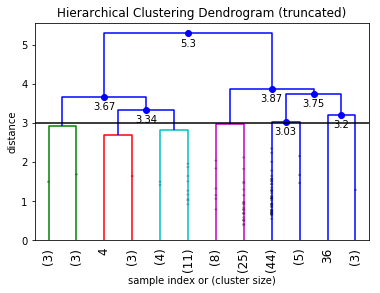

In [301]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [302]:
## Retrieving the clusters
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters_id = fcluster(Z, max_d, criterion='distance')
clusters_id

array([4, 5, 6, 4, 2, 5, 6, 5, 2, 5, 4, 5, 5, 3, 7, 3, 3, 4, 4, 5, 4, 5,
       1, 5, 5, 4, 4, 4, 3, 4, 5, 5, 5, 5, 4, 5, 8, 4, 5, 4, 3, 5, 4, 4,
       5, 5, 5, 6, 6, 5, 5, 2, 4, 4, 5, 5, 1, 3, 4, 4, 5, 4, 4, 1, 1, 4,
       4, 3, 5, 5, 3, 5, 4, 5, 7, 5, 4, 5, 1, 5, 5, 5, 1, 3, 2, 4, 5, 4,
       3, 5, 7, 6, 3, 4, 3, 5, 4, 3, 4, 5, 5, 3, 5, 4, 5, 3, 5, 5, 5, 4,
       4], dtype=int32)

In [303]:
##Add the cluster membership to first dataframe x
country_hrcho['cluster_id'] = clusters_id[:]
## Sort the countries in x by cluster membership
country_hrch_cluster_sort = country_hrcho.sort_values('cluster_id')
#del y_cluster_sort['clusters_id'] 

In [304]:
print(country_hrch_cluster_sort.tail())

          country  child_mort  exports   health  imports  income  inflation  \
140     Sri Lanka        11.2   550.76   82.614   753.08    8560      22.80   
108       Namibia        56.0  2480.82  351.882  3150.33    8460       3.56   
137  South Africa        53.7  2082.08  650.832  1994.72   12000       6.35   
21       Botswana        52.5  2768.60  527.050  3257.55   13300       8.92   
55          Gabon        63.7  5048.75  306.250  1653.75   15400      16.60   

     life_expec  total_fer  gdpp  cluster_id  
140        74.4       2.20  2810           6  
108        58.6       3.60  5190           7  
137        54.3       2.59  7280           7  
21         57.1       2.88  6350           7  
55         62.9       4.08  8750           8  


In [305]:
## separate countries  based on cluster membership
c1 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 1]
c2 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 2]
c3 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 3]
c4 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 4]
c5 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 5]
c6 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 6]
#c7 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 7]
#c8 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 8]
#c9 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 9]
#c10 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 10]

In [306]:
#calculate mean values for each clusters
c1_m = pd.DataFrame(c1.mean())
c2_m = pd.DataFrame(c2.mean())
c3_m = pd.DataFrame(c3.mean())
c4_m = pd.DataFrame(c4.mean())
c5_m = pd.DataFrame(c5.mean())
c6_m = pd.DataFrame(c6.mean())
#c7_m = pd.DataFrame(c7.mean())
#c8_m = pd.DataFrame(c8.mean())
#c9_m = pd.DataFrame(c9.mean())
#c10_m = pd.DataFrame(c10.mean())


In [307]:
print(c2)

        country  child_mort  exports   health  imports  income  inflation  \
125      Russia        10.0  3124.40  543.560  2257.70   23100       14.2   
14      Belarus         5.5  3099.42  338.283  3889.35   16200       15.1   
79   Kazakhstan        21.5  4008.94  389.103  2711.93   20100       19.5   
5     Argentina        14.5  1946.70  834.300  1648.00   18700       20.9   

     life_expec  total_fer   gdpp  cluster_id  
125        69.2       1.57  10700           2  
14         70.4       1.49   6030           2  
79         68.4       2.60   9070           2  
5          75.8       2.37  10300           2  


In [308]:
##Concatenate the six dataframes along axis =1 using the index from c1means
summary_hc = pd.concat([c1_m, c2_m, c3_m, c4_m,c5_m,c6_m], axis=1, join_axes = [c1_m.index])
#summary_hc = pd.concat([c1_m, c2_m], axis=1, join_axes = [c1_m.index])
#summary_hc = pd.concat([c1_m, c2_m, c3_m, c4_m,c5_m,c6_m, c7_m, c8_m,c9_m], axis=1, join_axes = [c1_m.index])

In [309]:
## Assign column names to the dataframe summary
summary_hc.columns = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4','cluster_5','cluster_6']
#summary_hc.columns = ['cluster_1', 'cluster_2']
#summary_hc.columns = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4','cluster_5', 'cluster_6', 'cluster_7', 'cluster_8','cluster_9']
print(summary_hc)

               cluster_1   cluster_2     cluster_3    cluster_4    cluster_5  \
child_mort     10.550000     12.8750     13.526667    89.842424    32.640909   
exports      5838.571667   3044.8650   2626.942000   332.434455  1008.614057   
health        703.953833    526.3115    588.129667    52.846018   171.284577   
imports      5495.043333   2626.7450   3311.650000   416.448394  1333.536843   
income      17750.000000  19525.0000  14209.333333  2088.939394  6384.545455   
inflation       3.758000     17.4250      3.865867     9.283182     6.891159   
life_expec     76.450000     70.9500     75.180000    59.666667    70.709091   
total_fer       1.941667      2.0075      1.810000     5.244242     2.679318   
gdpp        10175.000000   9025.0000   7840.666667   929.333333  2854.363636   
cluster_id      1.000000      2.0000      3.000000     4.000000     5.000000   

             cluster_6  
child_mort     26.7800  
exports      1760.1680  
health        271.2236  
imports      1232.7

In [310]:
#Country Analysis - for Funding criteria

country_hrch_cluster_sort[country_hrch_cluster_sort['country'].isin(['Afghanistan','Sudan','Iraq','United Kingdom','India'])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
142,Sudan,76.7,291.56,93.5360,254.560,3370,19.60,66.3,4.88,1480,4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,4
69,India,58.8,305.10,54.6750,365.850,4410,8.98,66.2,2.60,1350,5
72,Iraq,36.9,1773.00,378.4500,1534.500,12700,16.60,67.2,4.56,4500,6


> Cluster 4 falls under Funding Criteria

    > Afghanistan & Sudanfalls under the funding criteria

In [311]:
country_hrch_cluster_sort.groupby('cluster_id' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
117,Panama,19.7,5656.000,654.4800,6318.56,15400,2.590,77.8,2.62,8080,1
85,Latvia,7.8,6068.100,754.8400,6226.30,18300,-0.812,73.1,1.36,11300,1
95,Malaysia,7.9,7881.830,398.1730,6439.70,21100,7.270,74.5,2.15,9070,1
125,Russia,10.0,3124.400,543.5600,2257.70,23100,14.200,69.2,1.57,10700,2
14,Belarus,5.5,3099.420,338.2830,3889.35,16200,15.100,70.4,1.49,6030,2
79,Kazakhstan,21.5,4008.940,389.1030,2711.93,20100,19.500,68.4,2.60,9070,2
143,Suriname,24.1,4357.500,581.8300,3187.20,14200,7.200,70.3,2.52,8300,3
61,Grenada,14.6,1754.060,431.8820,3626.04,11200,0.480,71.3,2.24,7370,3
160,Uruguay,10.6,3129.700,993.6500,3022.60,17100,4.910,76.4,2.08,11900,3
142,Sudan,76.7,291.560,93.5360,254.56,3370,19.600,66.3,4.88,1480,4


In [312]:
top3_cntryh1 = country_hrch_cluster_sort.groupby('cluster_id' , as_index=False).head(3)
top3_cntryh1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
117,Panama,19.7,5656.00,654.480,6318.56,15400,2.590,77.8,2.62,8080,1
85,Latvia,7.8,6068.10,754.840,6226.30,18300,-0.812,73.1,1.36,11300,1
95,Malaysia,7.9,7881.83,398.173,6439.70,21100,7.270,74.5,2.15,9070,1
125,Russia,10.0,3124.40,543.560,2257.70,23100,14.200,69.2,1.57,10700,2
14,Belarus,5.5,3099.42,338.283,3889.35,16200,15.100,70.4,1.49,6030,2


### Criteria for Funding 

#### Cluster 4 - High Child_mort, Low Income,  Low Health

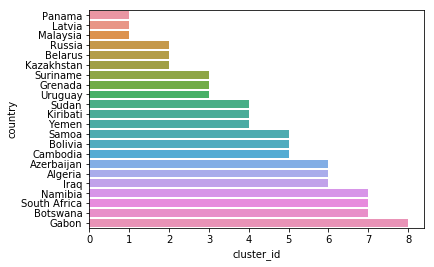

In [313]:
#plotting barplot
#sns.barplot(x=top3_cntry.cluster_ID, y=top3_cntry.country)
sns.barplot(x="cluster_id", y="country", data=top3_cntryh1)

In [314]:
country_hrch_cluster_sort.to_csv('hierarchy_nooutliers.csv')

In [315]:
### Hierarchial Clustering  - Only on Ouliers

In [316]:
# new dataframe for Hierarchial Clustering approach
country_hrch2 = country_outlier2.copy()
country_hrch2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,Antigua and Barbuda,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
11,Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700


In [317]:
country_hrch2o = country_hrch2.copy()

In [318]:
# drop country column
country_hrch2.drop(['country'],axis=1,inplace=True)


In [319]:
country_hrch2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,10.3,5551.0,735.66,7185.8,19100,1.440,76.8,2.13,12200
7,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
10,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000
11,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700


In [320]:
### Standardize the Variables

In [321]:
## Standardize the variables.
def standardization_f(country_hrch2):
    country_hrch2_bar = np.mean(country_hrch2)
    s = np.std(country_hrch2)
    country_hrch2_z = (country_hrch2 - country_hrch2_bar) / s
    return(country_hrch2_z)
print(country_hrch2.corr())
country_hrch2_z = country_hrch2.apply(standardization_f,result_type='broadcast')
country_hrch2_z.head()

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.253301 -0.423920 -0.270366 -0.490494   0.393904   
exports      -0.253301  1.000000  0.461550  0.985055  0.647552  -0.164077   
health       -0.423920  0.461550  1.000000  0.493244  0.445343  -0.341740   
imports      -0.270366  0.985055  0.493244  1.000000  0.551218  -0.202797   
income       -0.490494  0.647552  0.445343  0.551218  1.000000  -0.218244   
inflation     0.393904 -0.164077 -0.341740 -0.202797 -0.218244   1.000000   
life_expec   -0.948266  0.304233  0.519991  0.321289  0.532634  -0.344184   
total_fer     0.814507 -0.267860 -0.414201 -0.298368 -0.438162   0.551050   
gdpp         -0.501857  0.704509  0.855877  0.675172  0.795959  -0.325265   

            life_expec  total_fer      gdpp  
child_mort   -0.948266   0.814507 -0.501857  
exports       0.304233  -0.267860  0.704509  
health        0.519991  -0.414201  0.855877  
imports       0.321289  -0.298368  0.675172  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
4,-0.284472,-0.501137,-0.809658,-0.415357,-0.730922,-0.373986,0.120317,-0.121831,-0.863954
7,-0.403550,-0.327850,0.788778,-0.250334,0.251351,-0.391309,0.676448,-0.277420,0.949634
8,-0.414376,0.177631,1.053329,0.271203,0.330638,-0.409066,0.516026,-0.658612,0.721223
10,-0.208696,-0.345313,-0.189044,-0.187733,-0.563539,-0.487393,-0.200528,-0.331876,-0.142173
11,-0.321278,-0.177113,-0.686200,-0.264343,0.238137,-0.002766,0.034758,-0.098493,-0.475654


In [322]:
## making sure that the data is in n x p matrix format, where n = observations/individuals, p = features
mat = country_hrch2_z.as_matrix()

/Users/naveedjd/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [323]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [324]:
# generate the linkage matrix
Z = linkage(mat, 'average',metric='euclidean')

In [325]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [326]:
c, coph_dists = cophenet(Z, pdist(mat))
c

0.9338434522232024

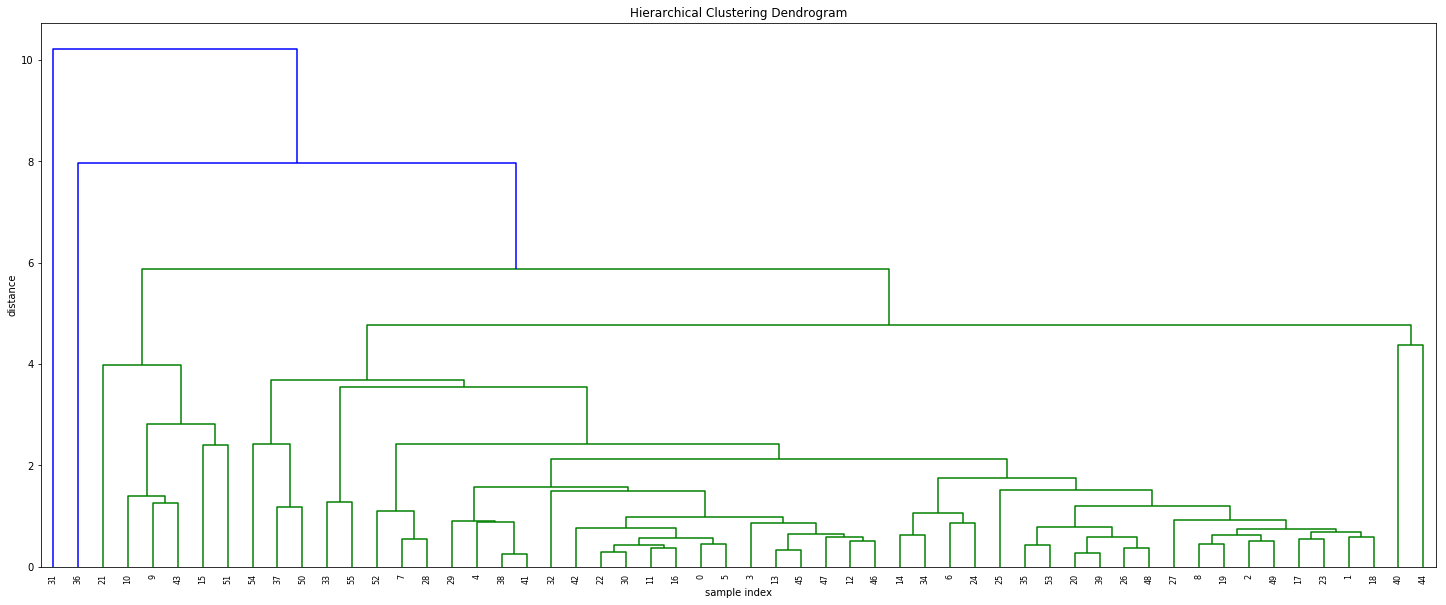

In [327]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [328]:
## From visual inspection, the cutoff distance is set at 3
max_d = 4

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

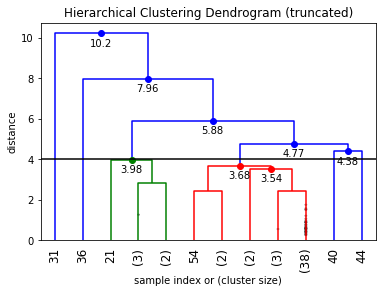

In [329]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [330]:
## Retrieving the clusters
from scipy.cluster.hierarchy import fcluster
max_d = 4
clusters_id = fcluster(Z, max_d, criterion='distance')
clusters_id

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 1,
       4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2], dtype=int32)

In [331]:
##Add the cluster membership to first dataframe x
country_hrch2o['cluster_id'] = clusters_id[:]
## Sort the countries in x by cluster membership
country_hrch2_cluster_sort = country_hrch2o.sort_values('cluster_id')
#del y_cluster_sort['clusters_id'] 

In [332]:
print(country_hrch2_cluster_sort.tail())

        country  child_mort    exports    health    imports  income  \
163   Venezuela        17.1    3847.50   662.850    2376.00   16500   
123       Qatar         9.0   43796.90  1272.430   16731.40  125000   
133   Singapore         2.8   93200.00  1845.360   81084.00   72100   
113     Nigeria       130.0     589.49   118.131     405.42    5150   
91   Luxembourg         2.8  183750.00  8158.500  149100.00   91700   

     inflation  life_expec  total_fer    gdpp  cluster_id  
163     45.900        75.4       2.47   13500           2  
123      6.980        79.5       2.07   70300           3  
133     -0.046        82.7       1.15   46600           4  
113    104.000        60.5       5.84    2330           5  
91       3.620        81.3       1.63  105000           6  


In [333]:
## separate countries  based on cluster membership
c1 = country_hrch2_cluster_sort.loc[country_hrch2_cluster_sort["cluster_id"] == 1]
c2 = country_hrch2_cluster_sort.loc[country_hrch2_cluster_sort["cluster_id"] == 2]
c3 = country_hrch2_cluster_sort.loc[country_hrch2_cluster_sort["cluster_id"] == 3]
c4 = country_hrch2_cluster_sort.loc[country_hrch2_cluster_sort["cluster_id"] == 4]
c5 = country_hrch2_cluster_sort.loc[country_hrch2_cluster_sort["cluster_id"] == 5]
#c6 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 6]
#c7 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 7]
#c8 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 8]
#c9 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 9]
#c10 = country_hrch_cluster_sort.loc[country_hrch_cluster_sort["cluster_id"] == 10]

In [334]:
#calculate mean values for each clusters
c1_m = pd.DataFrame(c1.mean())
c2_m = pd.DataFrame(c2.mean())
c3_m = pd.DataFrame(c3.mean())
c4_m = pd.DataFrame(c4.mean())
c5_m = pd.DataFrame(c5.mean())
#c6_m = pd.DataFrame(c6.mean())
#c7_m = pd.DataFrame(c7.mean())
#c8_m = pd.DataFrame(c8.mean())
#c9_m = pd.DataFrame(c9.mean())
#c10_m = pd.DataFrame(c10.mean())


In [335]:
print(c5)

     country  child_mort  exports   health  imports  income  inflation  \
113  Nigeria       130.0   589.49  118.131   405.42    5150      104.0   

     life_expec  total_fer  gdpp  cluster_id  
113        60.5       5.84  2330           5  


In [336]:
##Concatenate the six dataframes along axis =1 using the index from c1means
summary_hc = pd.concat([c1_m, c2_m, c3_m, c4_m,c5_m], axis=1, join_axes = [c1_m.index])
#summary_hc = pd.concat([c1_m, c2_m], axis=1, join_axes = [c1_m.index])

In [337]:
## Assign column names to the dataframe summary
summary_hc.columns = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4','cluster_5']
#summary_hc.columns = ['cluster_1', 'cluster_2']
print(summary_hc)

              cluster_1     cluster_2  cluster_3  cluster_4  cluster_5
child_mort   140.100000      7.117391       9.00      2.800    130.000
exports     2550.340333  16075.205435   43796.90  93200.000    589.490
health       208.466350   2960.994348    1272.43   1845.360    118.131
imports     2024.509000  14326.009783   16731.40  81084.000    405.420
income      6848.000000  36169.782609  125000.00  72100.000   5150.000
inflation     13.741667      4.829130       6.98     -0.046    104.000
life_expec    53.850000     78.493478      79.50     82.700     60.500
total_fer      5.295000      1.860652       2.07      1.150      5.840
gdpp        3850.666667  32498.913043   70300.00  46600.000   2330.000
cluster_id     1.000000      2.000000       3.00      4.000      5.000


In [338]:
country_hrch2_cluster_sort.groupby('cluster_id' ,as_index=False).head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.500,71.1,6.23,3600,1
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446,1
4,Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,2
90,Lithuania,6.1,7836.000,844.8000,8064.000,21100,2.380,73.2,1.50,12000,2
98,Malta,6.8,32283.000,1825.1500,32494.000,28300,3.830,80.3,1.36,21100,2
123,Qatar,9.0,43796.900,1272.4300,16731.400,125000,6.980,79.5,2.07,70300,3
133,Singapore,2.8,93200.000,1845.3600,81084.000,72100,-0.046,82.7,1.15,46600,4
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.000,60.5,5.84,2330,5
91,Luxembourg,2.8,183750.000,8158.5000,149100.000,91700,3.620,81.3,1.63,105000,6


In [339]:
country_hrch2_cluster_sort.to_csv('hierarchy_onlyoutliers.csv')

In [340]:
top3_cntryh2 = country_hrch2_cluster_sort.groupby('cluster_id' , as_index=False).head(3)
top3_cntryh2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
149,Timor-Leste,62.6,79.200,328.3200,1000.800,1850,26.50,71.1,6.23,3600,1
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
4,Antigua and Barbuda,10.3,5551.000,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
90,Lithuania,6.1,7836.000,844.8000,8064.000,21100,2.38,73.2,1.50,12000,2


### Criteria for Funding 

#### Cluster 1 - High Child_mort, Low Income,  Low Health

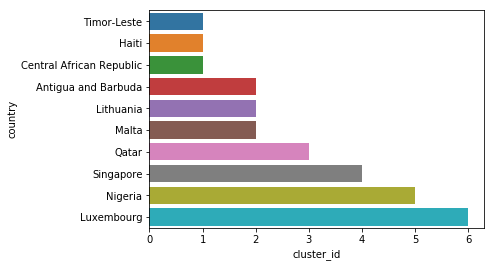

In [341]:
#plotting barplot
#sns.barplot(x=top3_cntry.cluster_ID, y=top3_cntry.country)
sns.barplot(x="cluster_id", y="country", data=top3_cntryh2)